In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
# sns.set_palette("viridis")
sns.set_palette('rocket')

# current_palette = sns.set_palette('rocket')
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=current_palette)
plt.rcParams['image.cmap'] = 'rocket'

In [2]:
ds = pd.read_csv('datasets/cleaned/merged_fx_dataset.csv')

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703 entries, 0 to 3702
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  3703 non-null   object 
 1   Buying                3703 non-null   float64
 2   Selling               3701 non-null   float64
 3   MidRate               3701 non-null   float64
 4   MPR                   3703 non-null   float64
 5   FoodInflation         3703 non-null   float64
 6   GhInflationRate       3703 non-null   float64
 7   NonFoodInflation      3703 non-null   float64
 8   BrentOil              3703 non-null   float64
 9   Cocoa                 3703 non-null   float64
 10  Gold                  3703 non-null   float64
 11  GhInterestRate        3703 non-null   float64
 12  NetForeignAssets      3703 non-null   float64
 13  NIR                   3703 non-null   float64
 14  Imports               3703 non-null   float64
 15  Exports              

In [4]:
ds.head()

,Date,Buying,Selling,MidRate,MPR,FoodInflation,GhInflationRate,NonFoodInflation,BrentOil,Cocoa,...,GhCompositeIndex,FXDeposits,InterbankWeightedAvg,T-bill-182,T-bill-91,PrivateSectorCredit,TradeBalance,USGDP,USInflationRate,USInterestRate
0,2022-12-01,13.0973,13.1105,13.1039,27.0,59.7,54.1,49.9,81.34,2538.57,...,0.00,45124.35,25.51,36.23,35.48,63753.45,450.75,22249.459,116.977,3.83
1,2022-11-30,13.0978,13.1110,13.1044,27.0,55.3,50.3,46.5,90.38,2469.10,...,-6.16,66496.63,25.80,35.68,34.62,73744.05,444.36,22249.459,116.554,3.83
2,2022-11-29,13.0980,13.1112,13.1046,27.0,55.3,50.3,46.5,90.38,2469.10,...,-6.16,66496.63,25.80,35.68,34.62,73744.05,444.36,22249.459,116.554,3.83
3,2022-11-28,13.0982,13.1114,13.1048,27.0,55.3,50.3,46.5,90.38,2469.10,...,-6.16,66496.63,25.80,35.68,34.62,73744.05,444.36,22249.459,116.554,3.83
4,2022-11-25,13.0985,13.1117,13.1051,27.0,55.3,50.3,46.5,90.38,2469.10,...,-6.16,66496.63,25.80,35.68,34.62,73744.05,444.36,22249.459,116.554,3.83


In [5]:
df = ds.drop(columns=['MidRate', 'Selling'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703 entries, 0 to 3702
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  3703 non-null   object 
 1   Buying                3703 non-null   float64
 2   MPR                   3703 non-null   float64
 3   FoodInflation         3703 non-null   float64
 4   GhInflationRate       3703 non-null   float64
 5   NonFoodInflation      3703 non-null   float64
 6   BrentOil              3703 non-null   float64
 7   Cocoa                 3703 non-null   float64
 8   Gold                  3703 non-null   float64
 9   GhInterestRate        3703 non-null   float64
 10  NetForeignAssets      3703 non-null   float64
 11  NIR                   3703 non-null   float64
 12  Imports               3703 non-null   float64
 13  Exports               3703 non-null   float64
 14  GhGDP                 3703 non-null   float64
 15  GhCompositeIndex     

In [7]:
df.head()

,Date,Buying,MPR,FoodInflation,GhInflationRate,NonFoodInflation,BrentOil,Cocoa,Gold,GhInterestRate,...,GhCompositeIndex,FXDeposits,InterbankWeightedAvg,T-bill-182,T-bill-91,PrivateSectorCredit,TradeBalance,USGDP,USInflationRate,USInterestRate
0,2022-12-01,13.0973,27.0,59.7,54.1,49.9,81.34,2538.57,1796.21,25.508,...,0.00,45124.35,25.51,36.23,35.48,63753.45,450.75,22249.459,116.977,3.83
1,2022-11-30,13.0978,27.0,55.3,50.3,46.5,90.38,2469.10,1726.39,25.800,...,-6.16,66496.63,25.80,35.68,34.62,73744.05,444.36,22249.459,116.554,3.83
2,2022-11-29,13.0980,27.0,55.3,50.3,46.5,90.38,2469.10,1726.39,25.800,...,-6.16,66496.63,25.80,35.68,34.62,73744.05,444.36,22249.459,116.554,3.83
3,2022-11-28,13.0982,27.0,55.3,50.3,46.5,90.38,2469.10,1726.39,25.800,...,-6.16,66496.63,25.80,35.68,34.62,73744.05,444.36,22249.459,116.554,3.83
4,2022-11-25,13.0985,27.0,55.3,50.3,46.5,90.38,2469.10,1726.39,25.800,...,-6.16,66496.63,25.80,35.68,34.62,73744.05,444.36,22249.459,116.554,3.83


In [8]:
# df.set_index('Date', inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3703 entries, 2008-01-02 to 2022-12-01
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Buying                3703 non-null   float64
 1   MPR                   3703 non-null   float64
 2   FoodInflation         3703 non-null   float64
 3   GhInflationRate       3703 non-null   float64
 4   NonFoodInflation      3703 non-null   float64
 5   BrentOil              3703 non-null   float64
 6   Cocoa                 3703 non-null   float64
 7   Gold                  3703 non-null   float64
 8   GhInterestRate        3703 non-null   float64
 9   NetForeignAssets      3703 non-null   float64
 10  NIR                   3703 non-null   float64
 11  Imports               3703 non-null   float64
 12  Exports               3703 non-null   float64
 13  GhGDP                 3703 non-null   float64
 14  GhCompositeIndex      3703 non-null   float64
 15  FXD

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3703 entries, 2008-01-02 to 2022-12-01
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Buying                3703 non-null   float64
 1   MPR                   3703 non-null   float64
 2   FoodInflation         3703 non-null   float64
 3   GhInflationRate       3703 non-null   float64
 4   NonFoodInflation      3703 non-null   float64
 5   BrentOil              3703 non-null   float64
 6   Cocoa                 3703 non-null   float64
 7   Gold                  3703 non-null   float64
 8   GhInterestRate        3703 non-null   float64
 9   NetForeignAssets      3703 non-null   float64
 10  NIR                   3703 non-null   float64
 11  Imports               3703 non-null   float64
 12  Exports               3703 non-null   float64
 13  GhGDP                 3703 non-null   float64
 14  GhCompositeIndex      3703 non-null   float64
 15  FXD

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buying,3703.0,3.530772,2.075334,0.000000,1.506600,3.7796,5.08280,13.099100
MPR,3703.0,17.566298,3.887258,12.500000,14.500000,16.0000,19.00000,27.000000
FoodInflation,3703.0,9.406992,7.649873,-1.630000,5.330000,7.3500,11.47000,59.700000
GhInflationRate,3703.0,13.162123,6.548326,4.670000,8.640000,11.4100,16.91000,54.100000
NonFoodInflation,3703.0,15.904580,6.722725,6.740000,11.210000,14.2400,20.57000,49.900000
BrentOil,3703.0,78.275919,26.067664,26.625700,56.000000,74.8000,105.81000,134.800000
Cocoa,3703.0,2605.203195,364.240950,1904.600000,2324.818200,2555.8600,2897.60000,3430.400000
Gold,3703.0,1376.505611,293.762486,760.800000,1200.700000,1305.8000,1658.50000,1971.069500
GhInterestRate,3703.0,17.680631,4.783107,6.350000,13.570000,16.8420,22.10000,25.800000
NetForeignAssets,3703.0,2605.340835,1274.261697,-2167.127029,1977.552321,2654.5000,3484.78000,5521.651498


In [12]:
df['Buying'] = df['Buying'].replace(0, np.nan)
df['Buying'] = df['Buying'].interpolate()

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buying,3703.0,3.534003,2.070943,0.954300,1.513300,3.7796,5.08280,13.099100
MPR,3703.0,17.566298,3.887258,12.500000,14.500000,16.0000,19.00000,27.000000
FoodInflation,3703.0,9.406992,7.649873,-1.630000,5.330000,7.3500,11.47000,59.700000
GhInflationRate,3703.0,13.162123,6.548326,4.670000,8.640000,11.4100,16.91000,54.100000
NonFoodInflation,3703.0,15.904580,6.722725,6.740000,11.210000,14.2400,20.57000,49.900000
BrentOil,3703.0,78.275919,26.067664,26.625700,56.000000,74.8000,105.81000,134.800000
Cocoa,3703.0,2605.203195,364.240950,1904.600000,2324.818200,2555.8600,2897.60000,3430.400000
Gold,3703.0,1376.505611,293.762486,760.800000,1200.700000,1305.8000,1658.50000,1971.069500
GhInterestRate,3703.0,17.680631,4.783107,6.350000,13.570000,16.8420,22.10000,25.800000
NetForeignAssets,3703.0,2605.340835,1274.261697,-2167.127029,1977.552321,2654.5000,3484.78000,5521.651498


Buying
Skew : 1.06


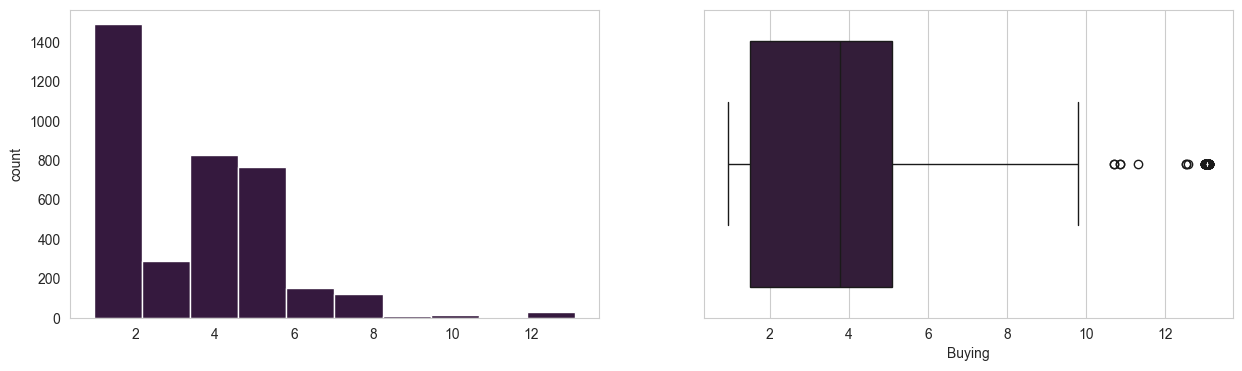

MPR
Skew : 0.92


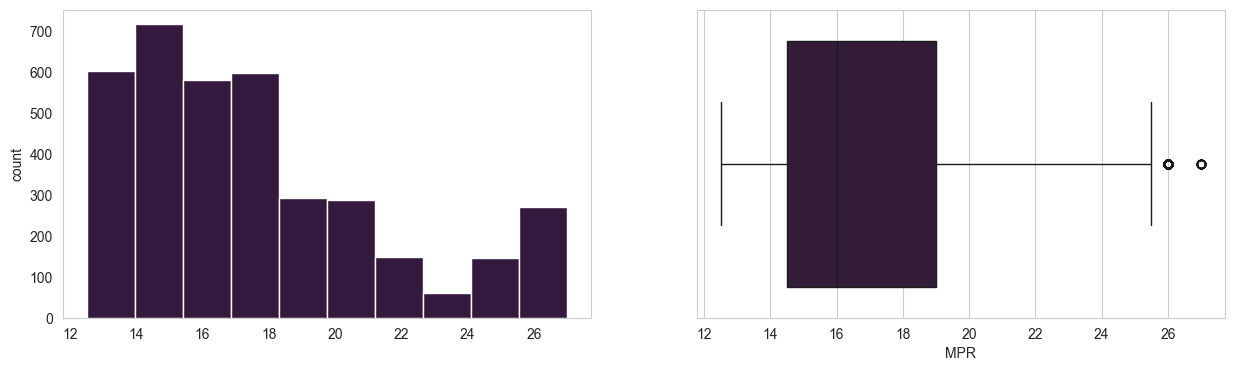

FoodInflation
Skew : 2.77


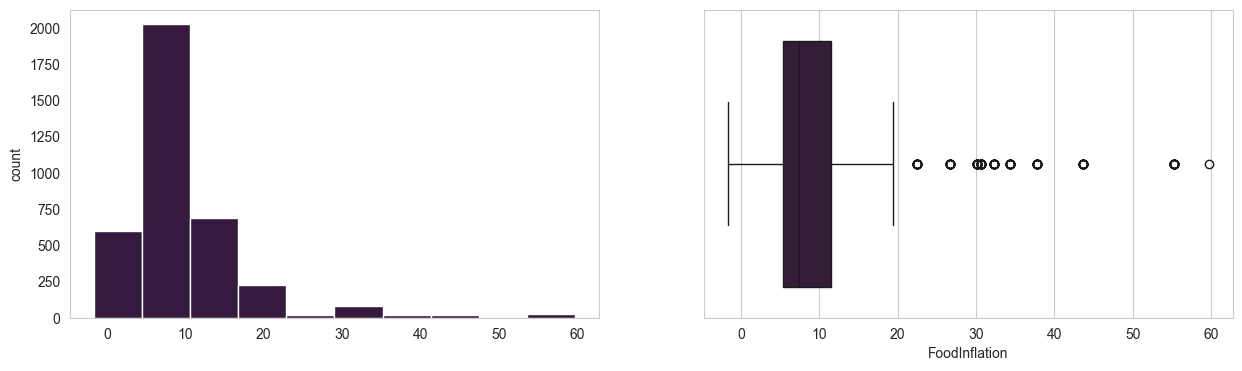

GhInflationRate
Skew : 2.22


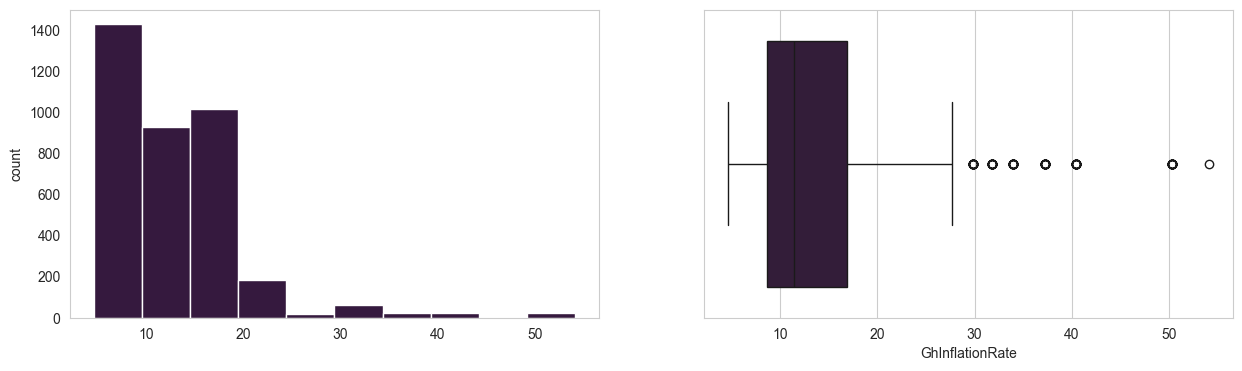

NonFoodInflation
Skew : 1.14


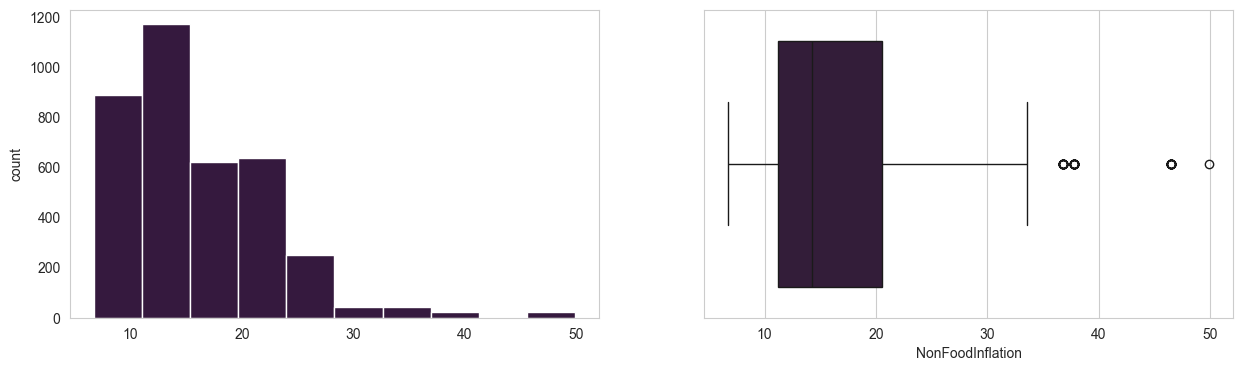

BrentOil
Skew : 0.16


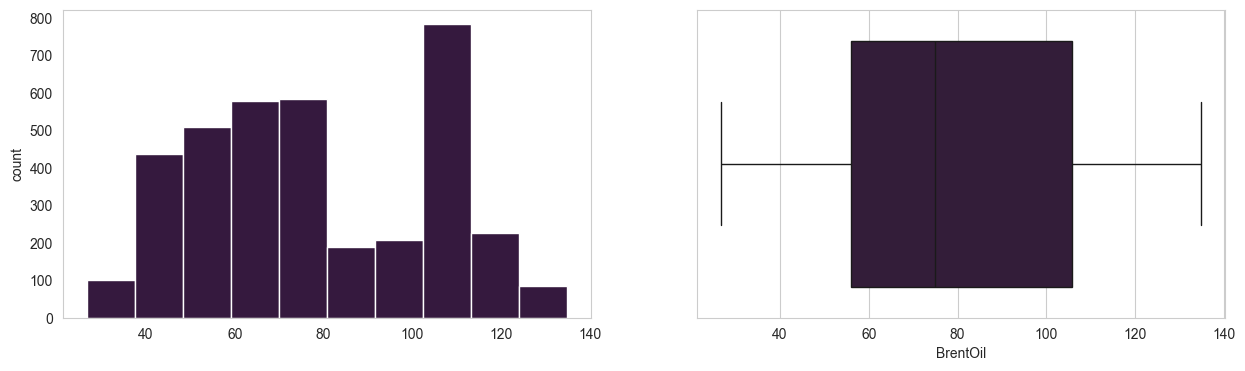

Cocoa
Skew : 0.2


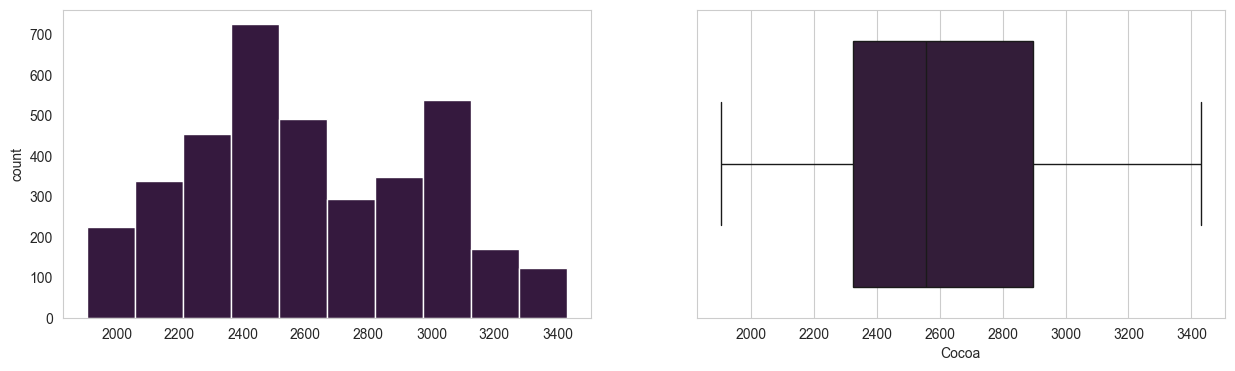

Gold
Skew : 0.13


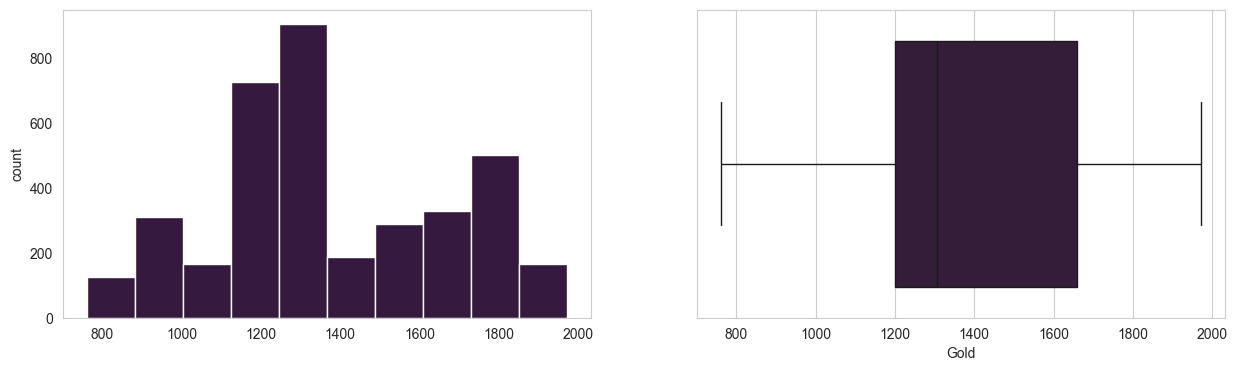

GhInterestRate
Skew : 0.18


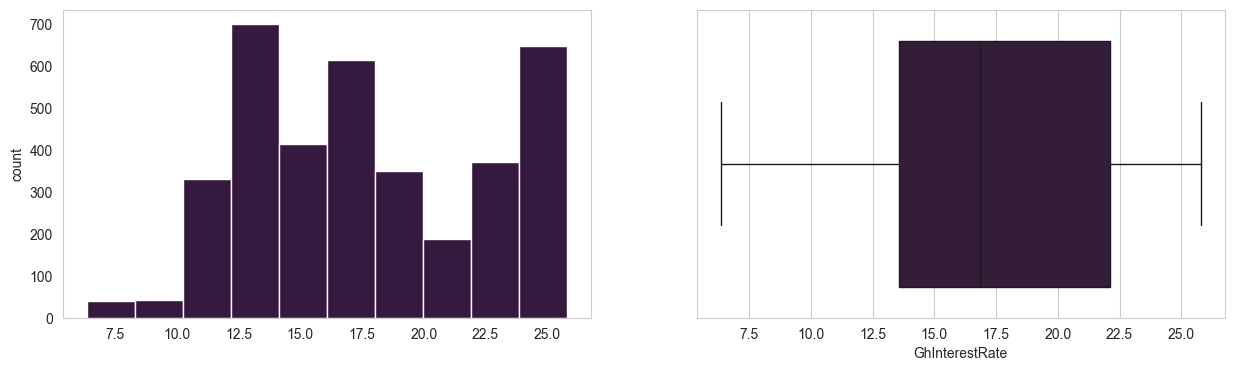

NetForeignAssets
Skew : -0.88


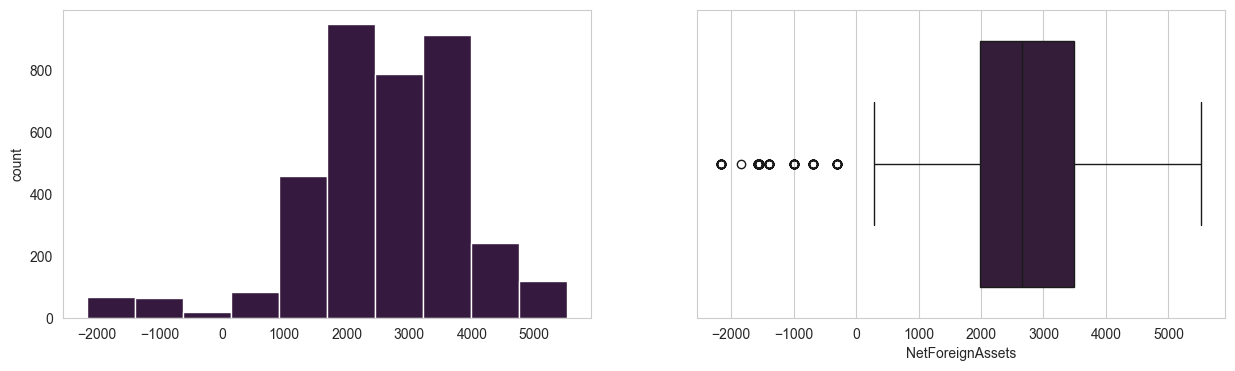

NIR
Skew : 0.75


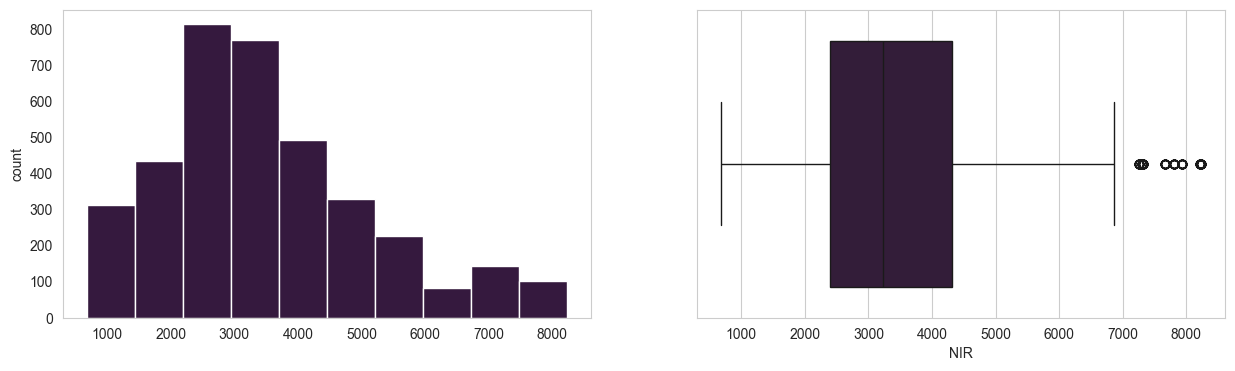

Imports
Skew : 0.08


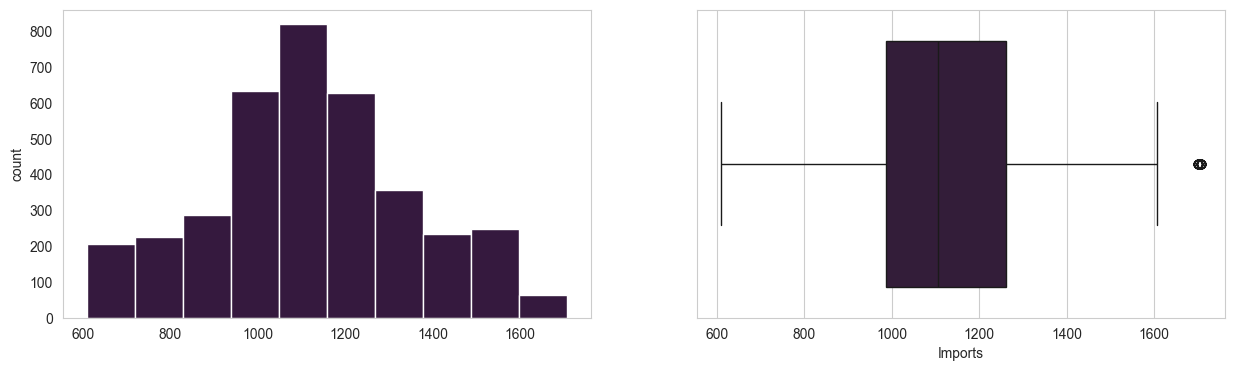

Exports
Skew : -0.45


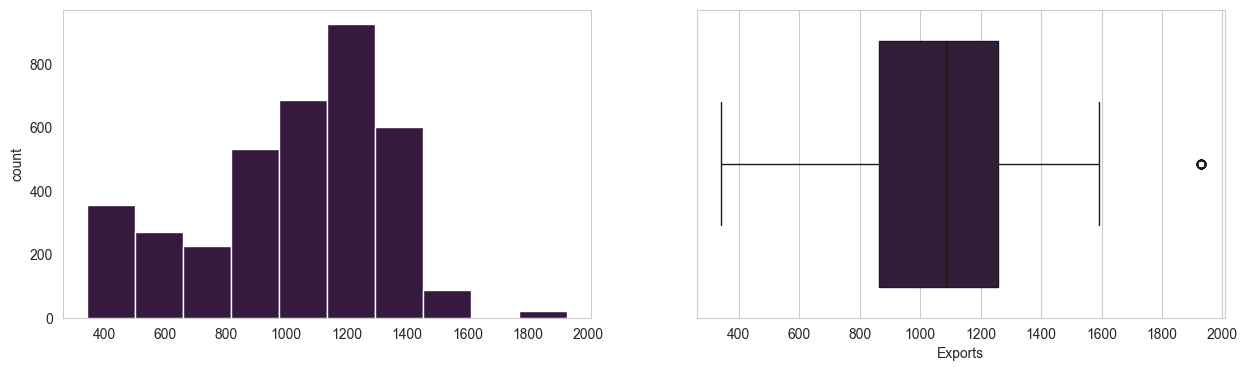

GhGDP
Skew : -0.12


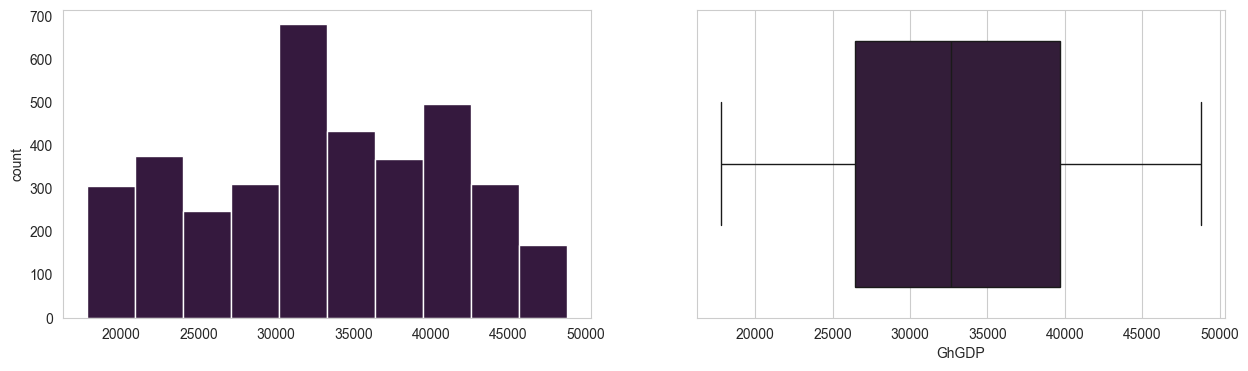

GhCompositeIndex
Skew : 2.12


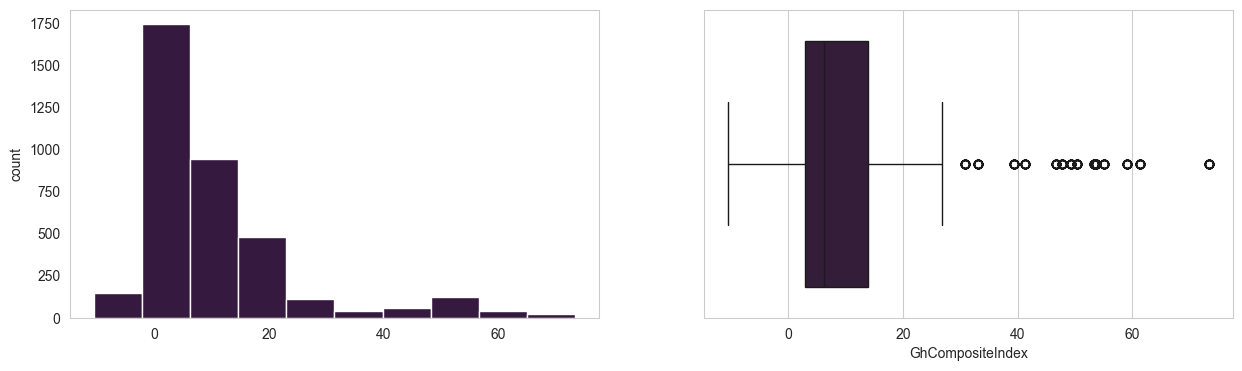

FXDeposits
Skew : 1.74


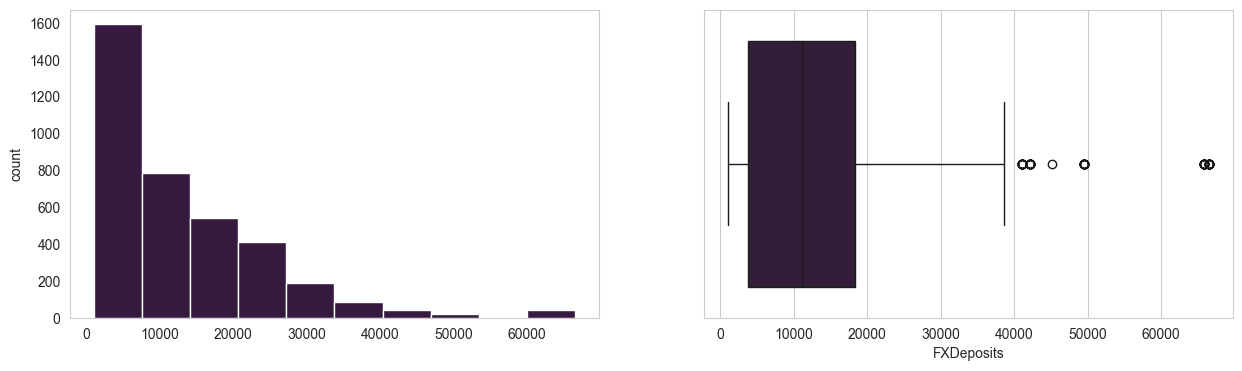

InterbankWeightedAvg
Skew : 0.17


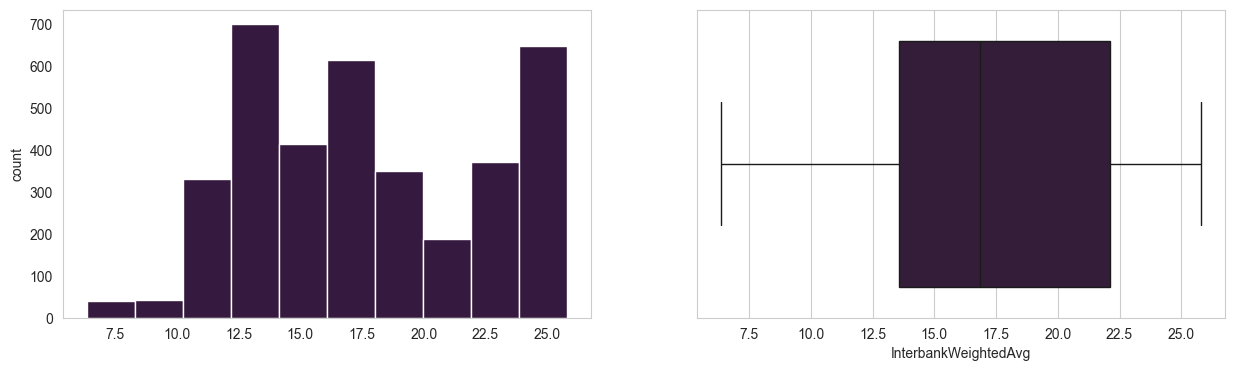

T-bill-182
Skew : 0.43


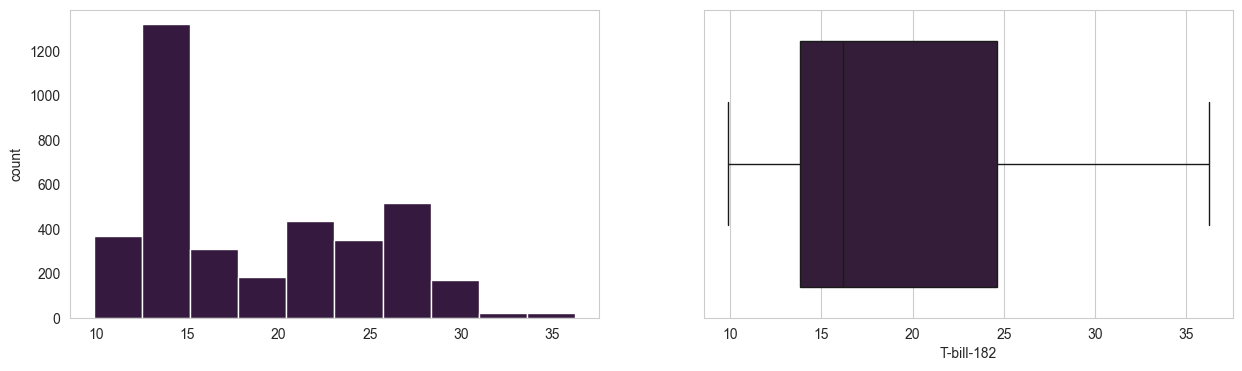

T-bill-91
Skew : 0.36


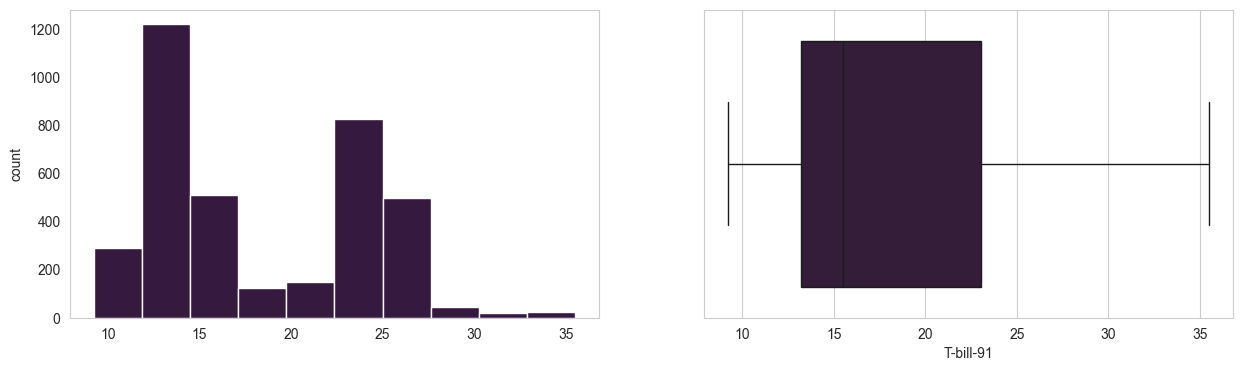

PrivateSectorCredit
Skew : 0.56


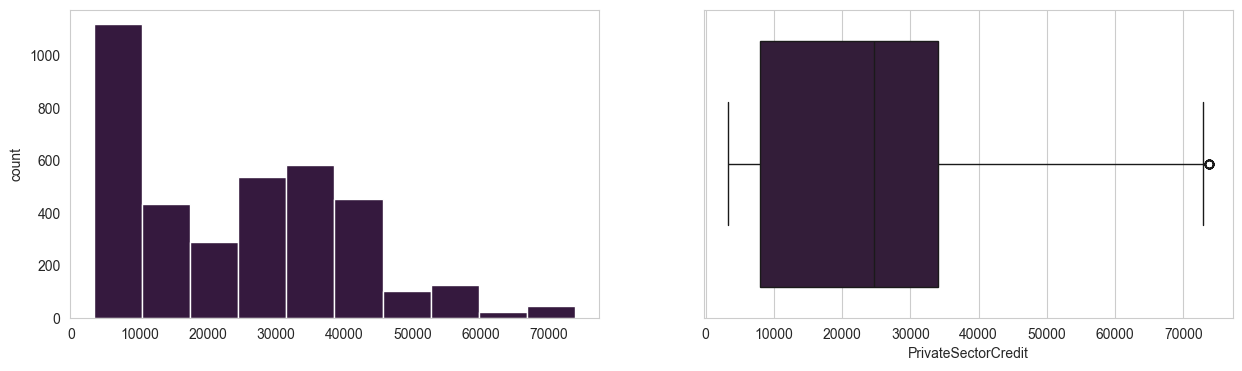

TradeBalance
Skew : 0.06


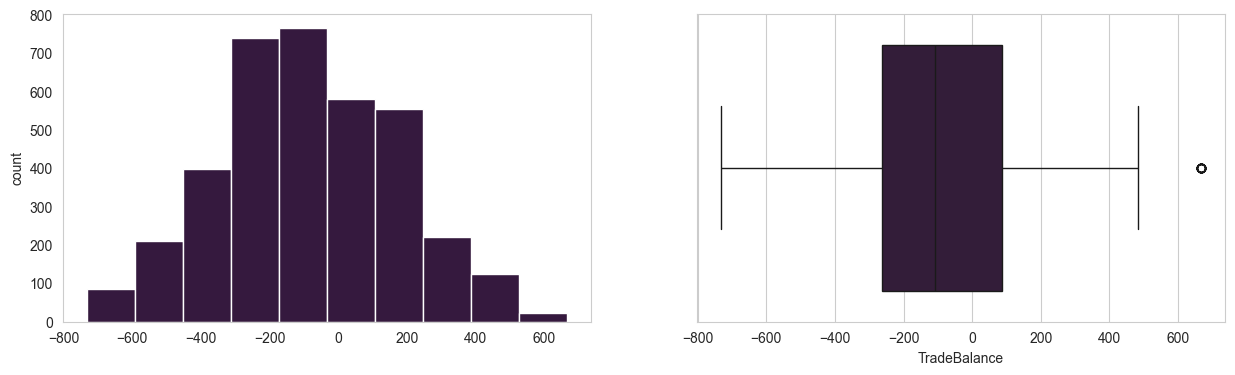

USGDP
Skew : 0.27


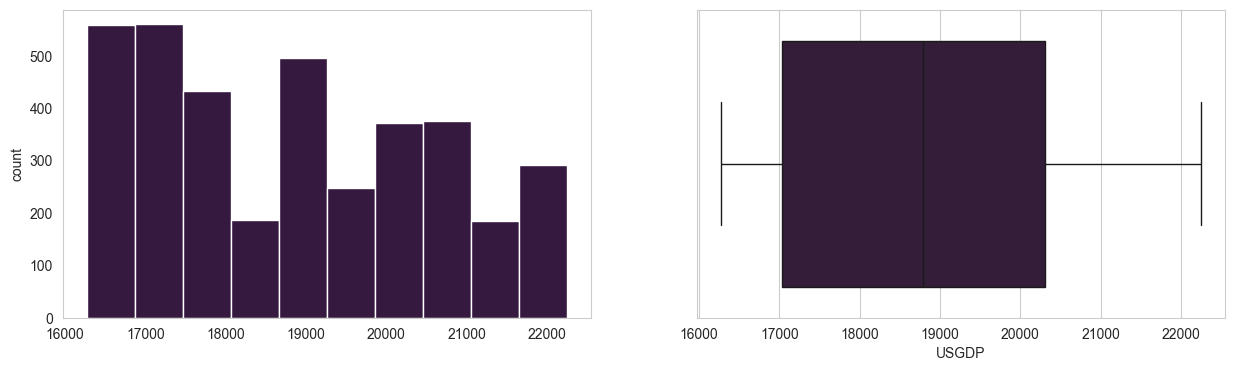

USInflationRate
Skew : 0.56


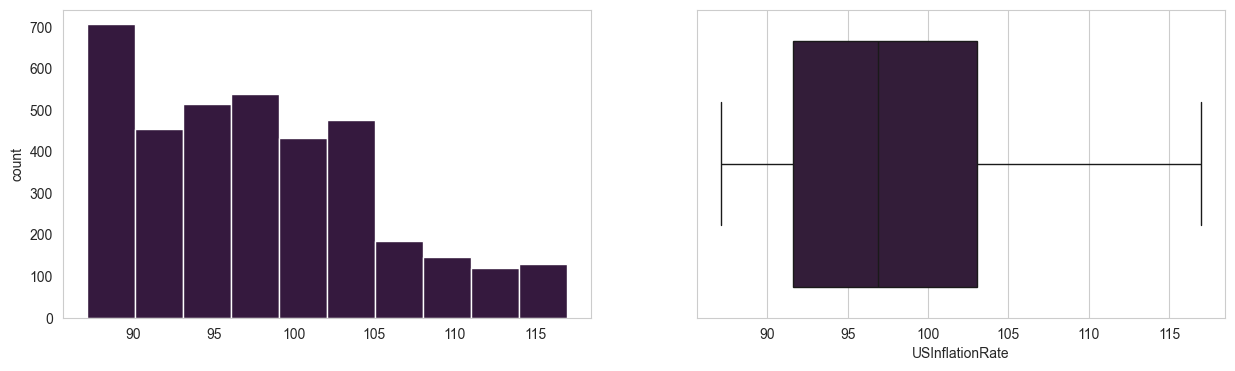

USInterestRate
Skew : 1.49


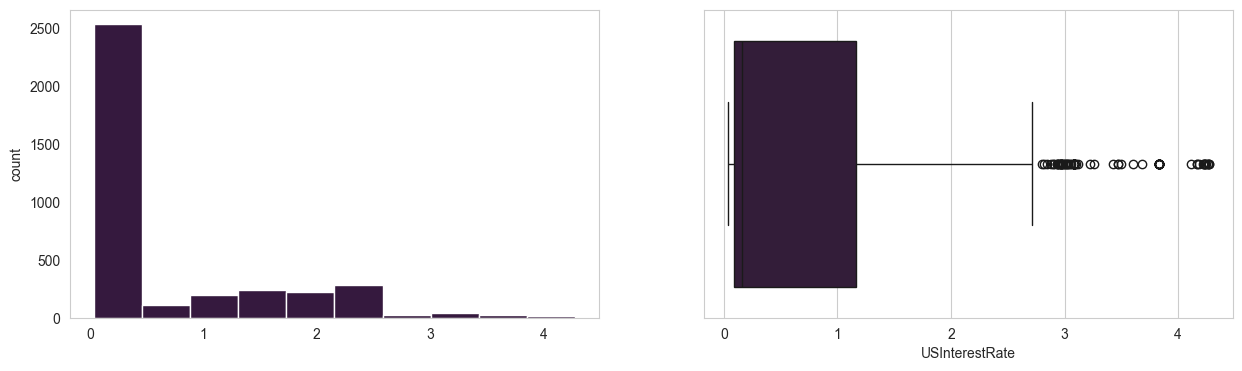

In [14]:
for col in df.columns:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [15]:
correlation_matrix = df.drop(columns=['MPR']).corr()

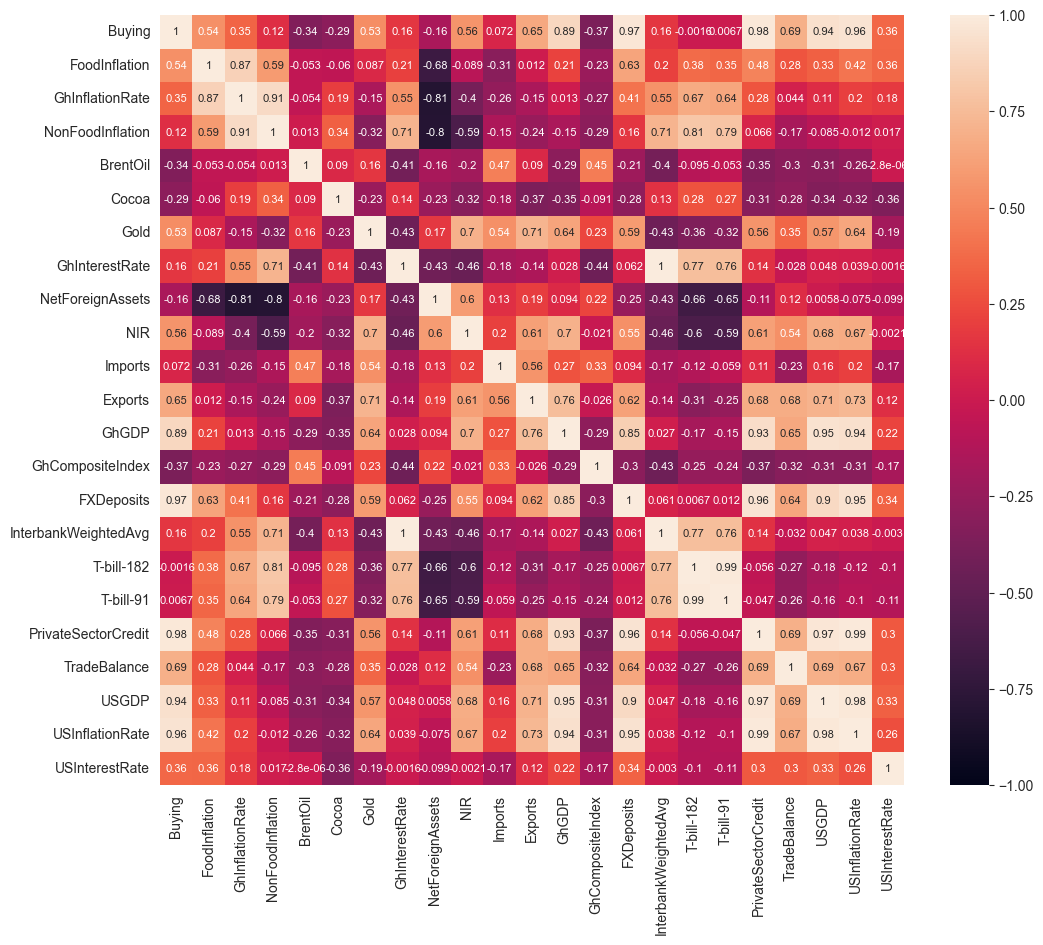

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, annot_kws={"size":8})
plt.show()

In [17]:
print(correlation_matrix['Buying'].sort_values(ascending=False))

Buying                  1.000000
PrivateSectorCredit     0.983942
FXDeposits              0.972815
USInflationRate         0.960247
USGDP                   0.938172
GhGDP                   0.894269
TradeBalance            0.687899
Exports                 0.648955
NIR                     0.556238
FoodInflation           0.539657
Gold                    0.528760
USInterestRate          0.359582
GhInflationRate         0.349047
GhInterestRate          0.161116
InterbankWeightedAvg    0.159287
NonFoodInflation        0.123998
Imports                 0.072266
T-bill-91               0.006745
T-bill-182             -0.001561
NetForeignAssets       -0.160730
Cocoa                  -0.291506
BrentOil               -0.343923
GhCompositeIndex       -0.372779
Name: Buying, dtype: float64



--- 3. Exploratory Data Analysis (EDA) ---


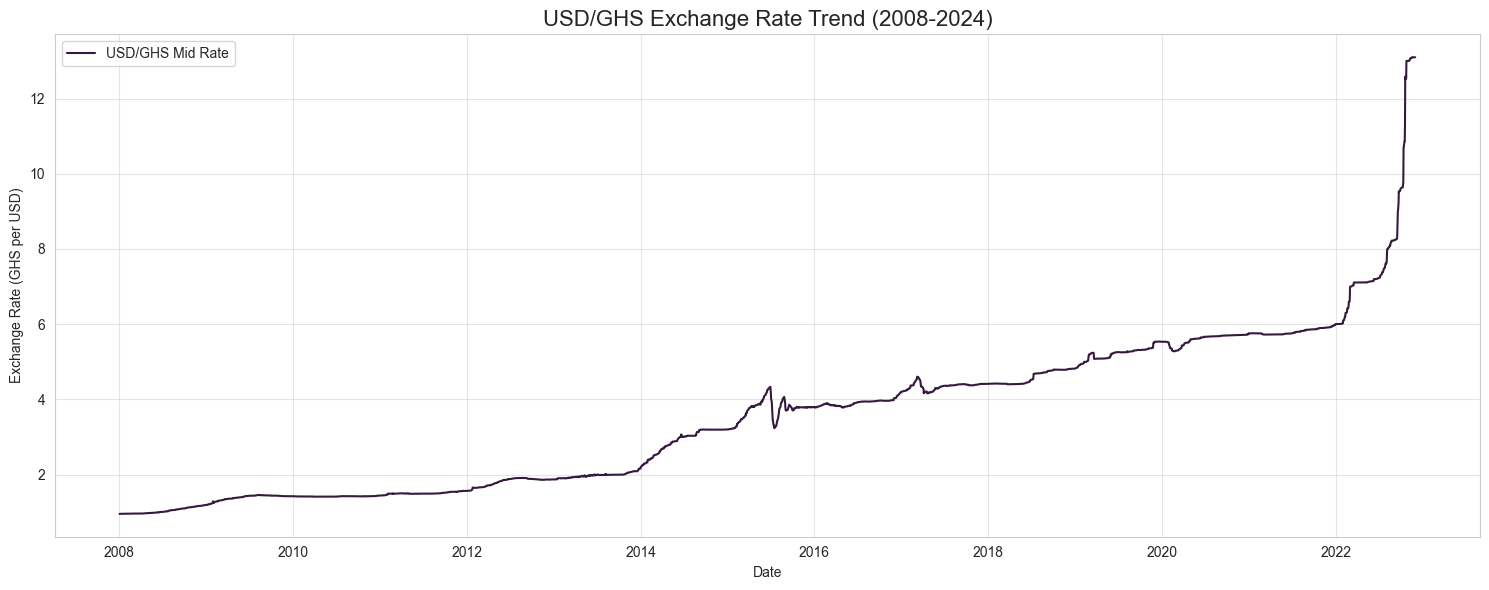

In [18]:
print("\n--- 3. Exploratory Data Analysis (EDA) ---")
plt.figure(figsize=(15, 6))
# plt.plot(df.index, df['Buying'],
#          label='USD/GHS Mid Rate', color='darkblue')
plt.plot(df.index, df['Buying'], label='USD/GHS Mid Rate')
plt.title('USD/GHS Exchange Rate Trend (2008-2024)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Exchange Rate (GHS per USD)')
plt.grid(True, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

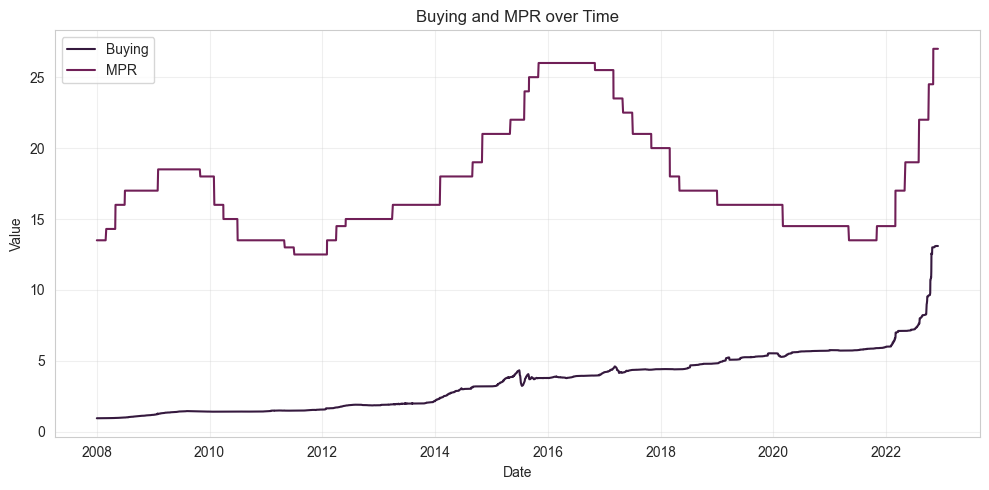

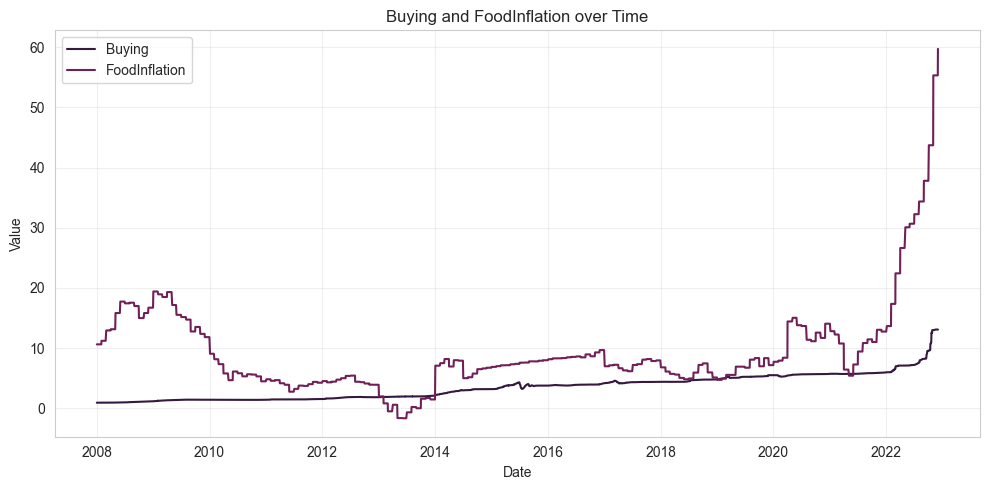

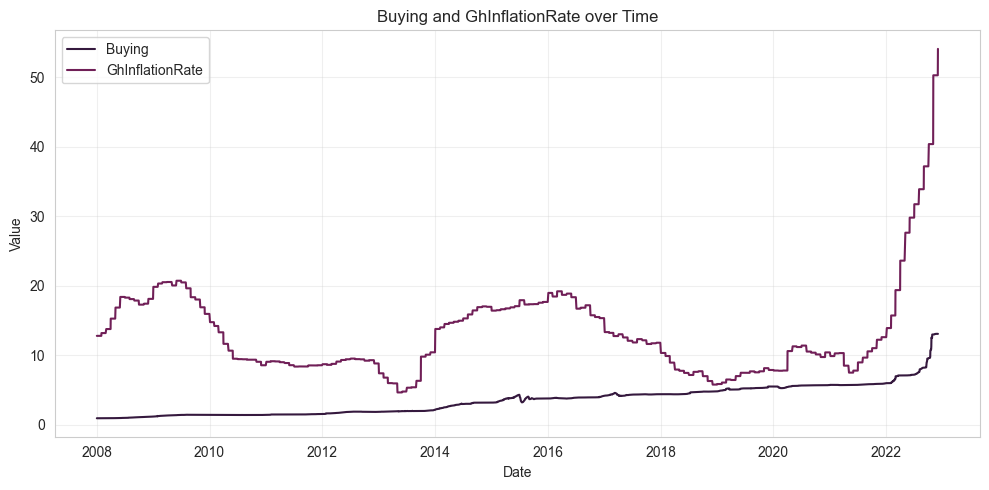

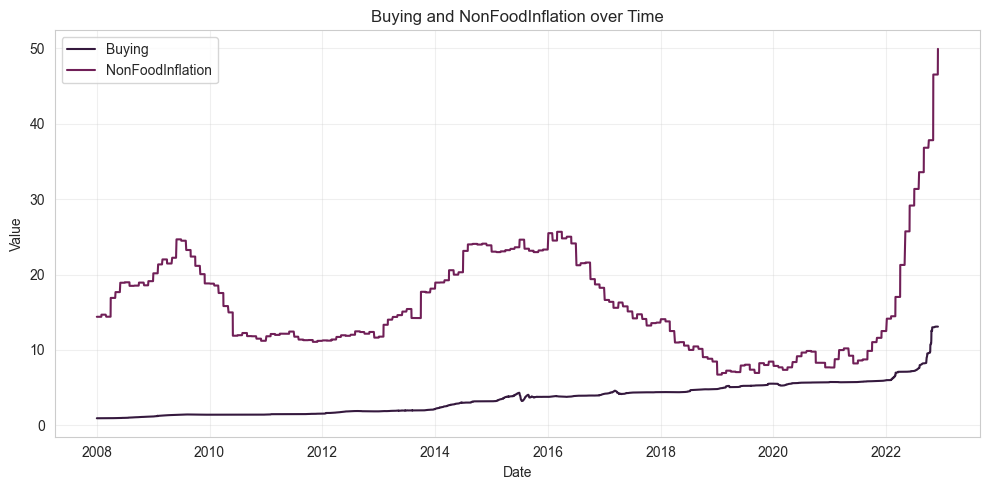

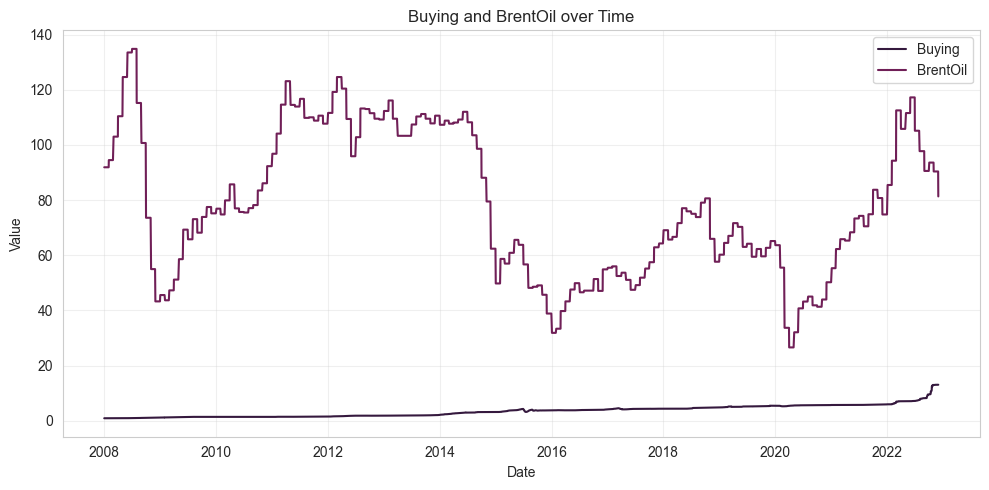

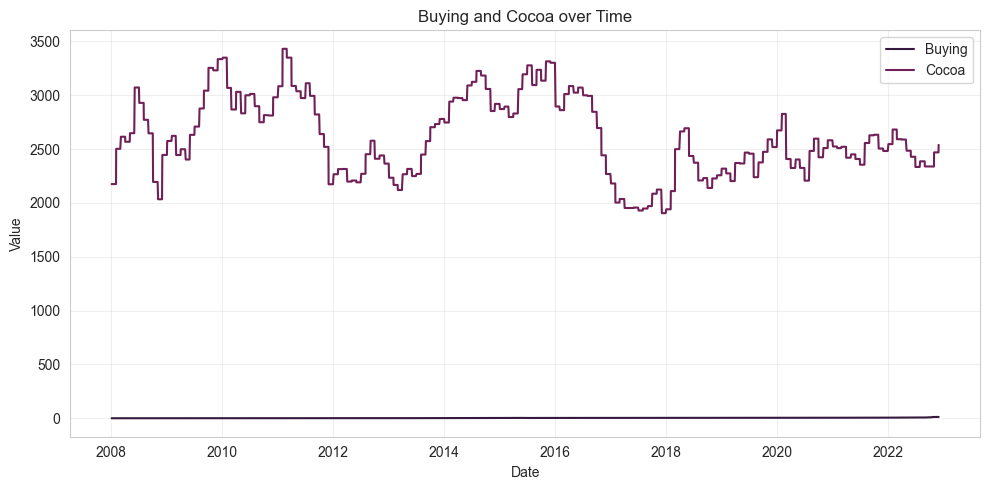

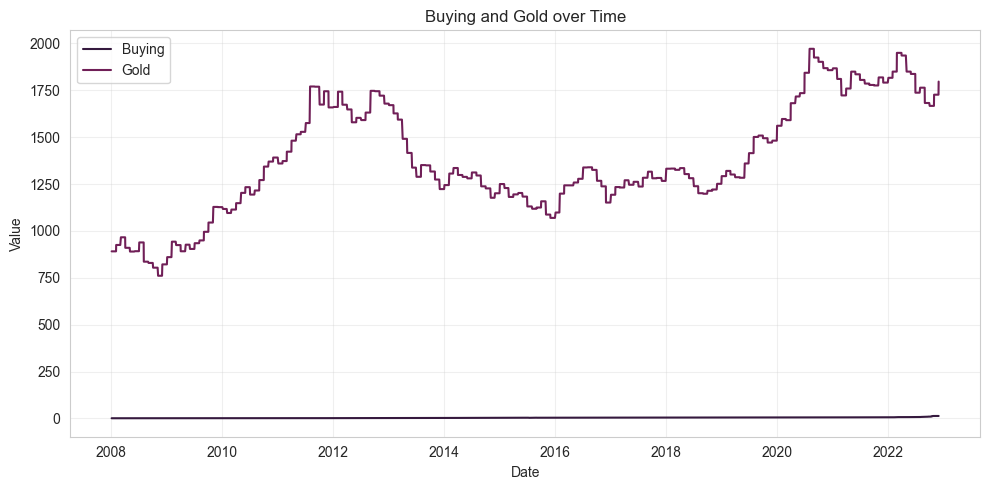

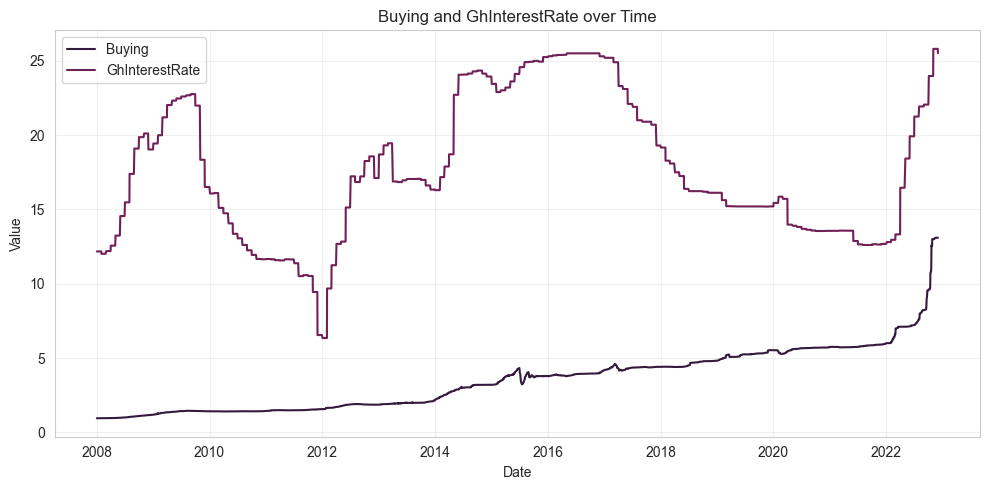

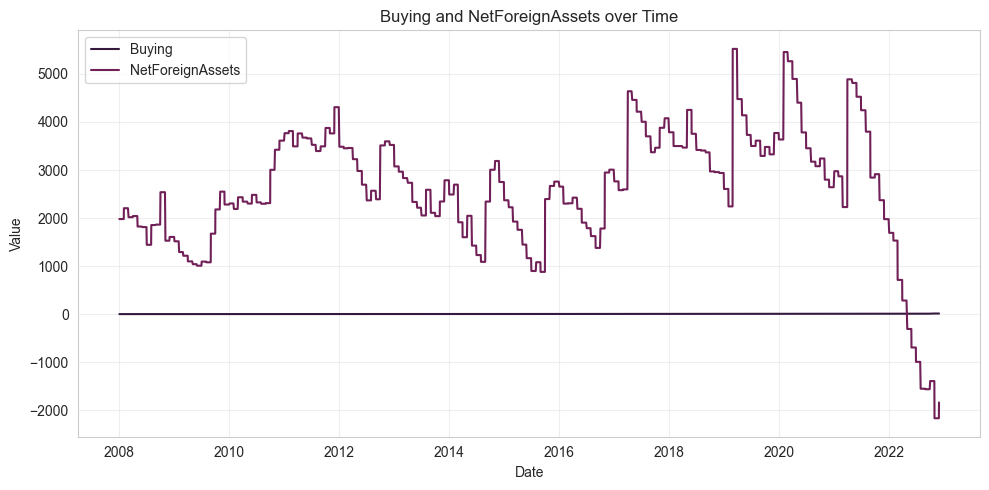

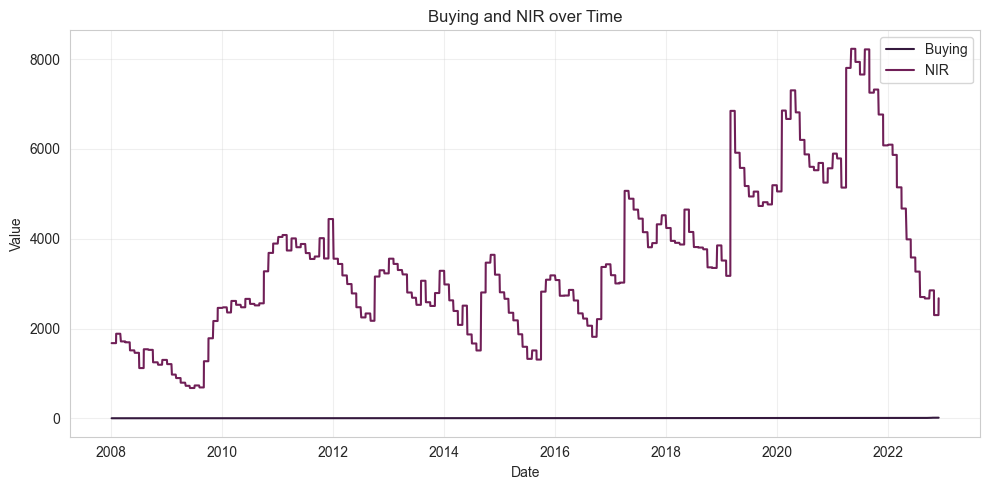

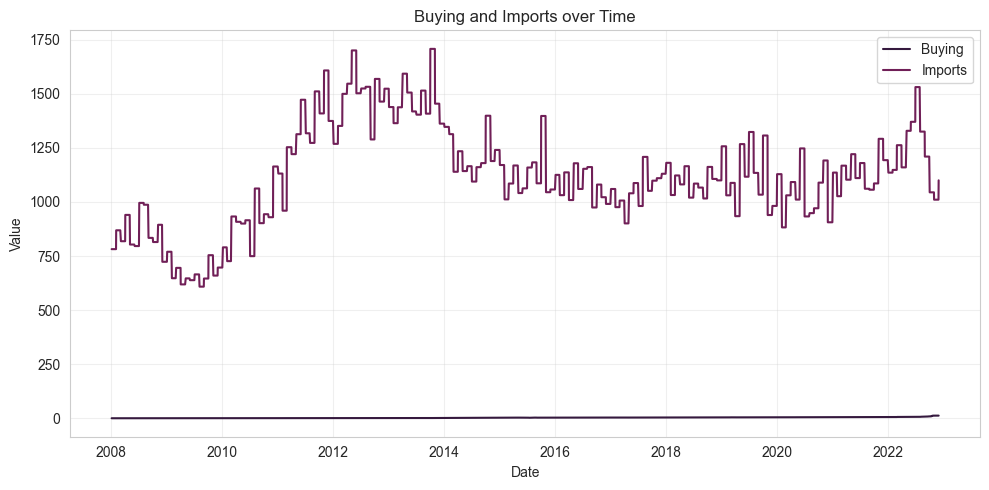

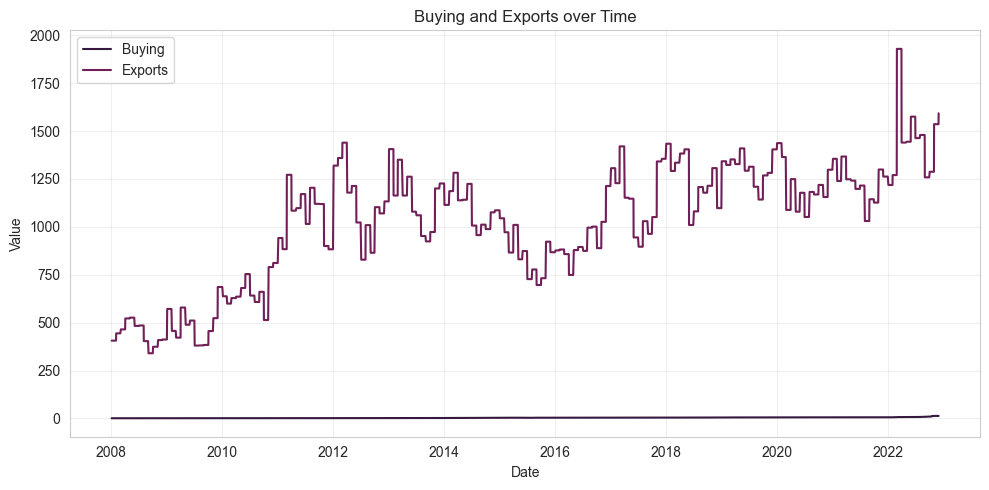

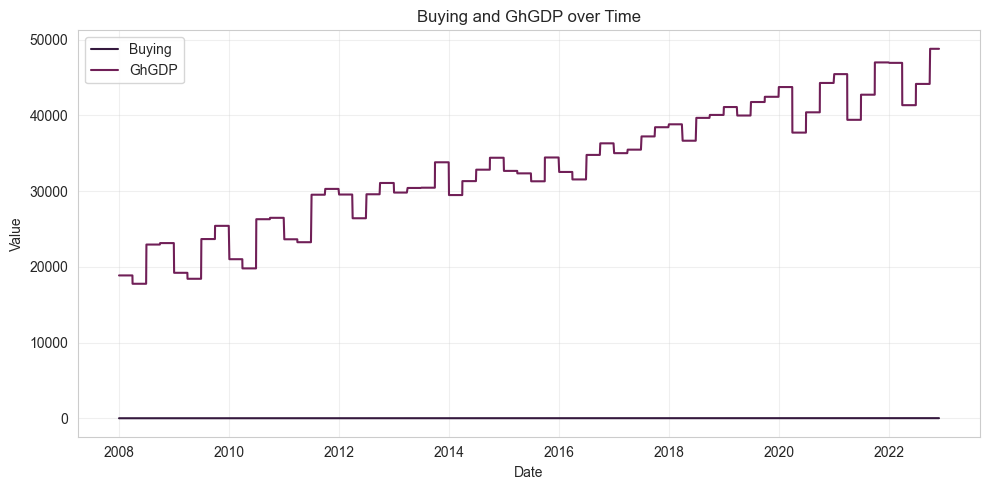

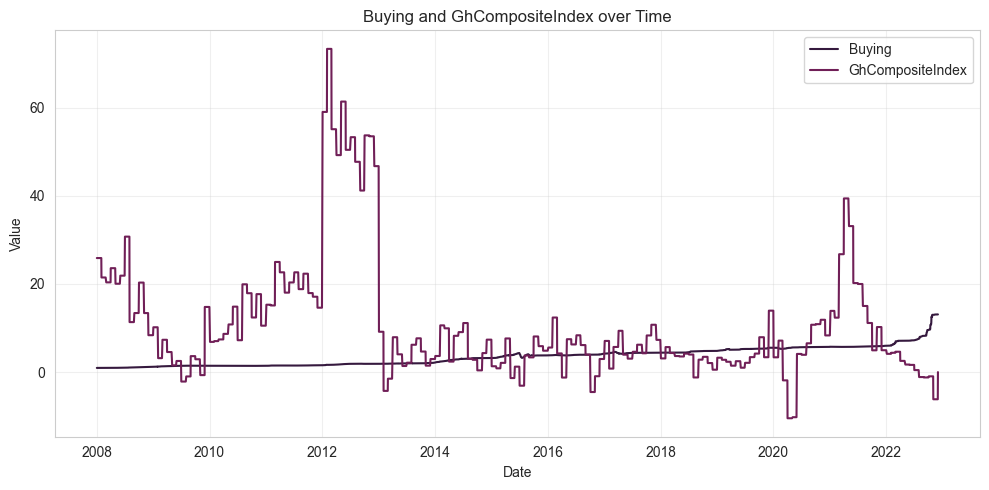

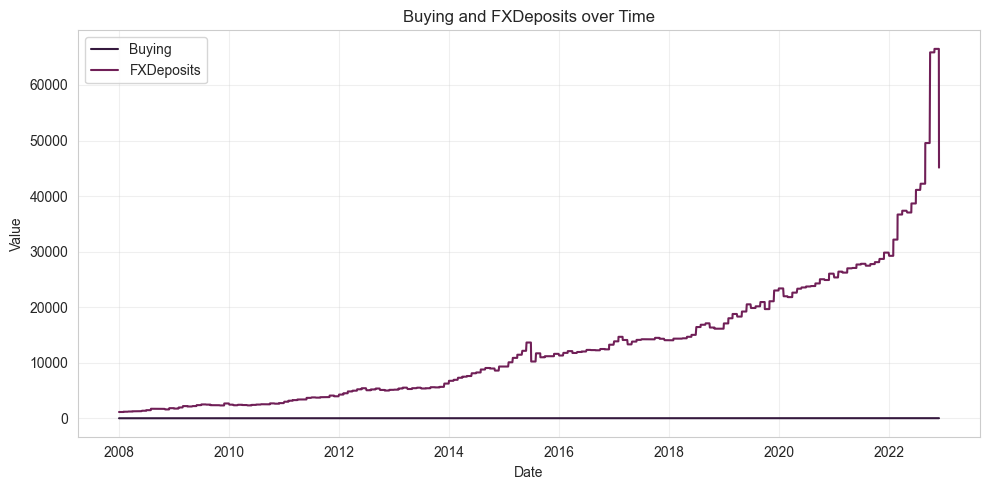

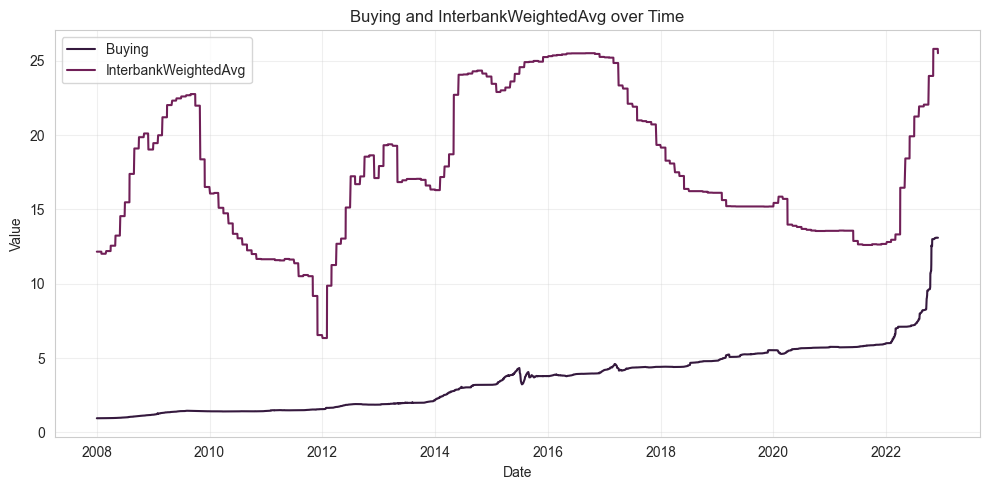

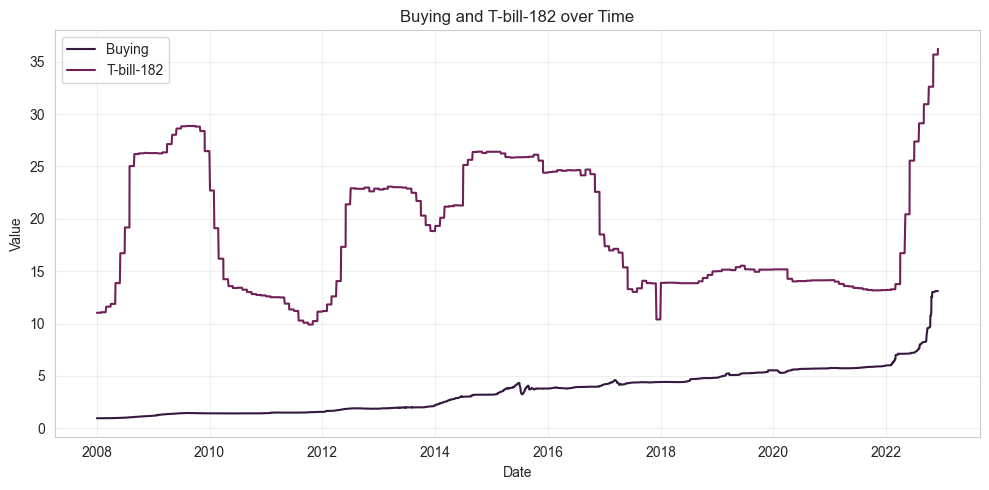

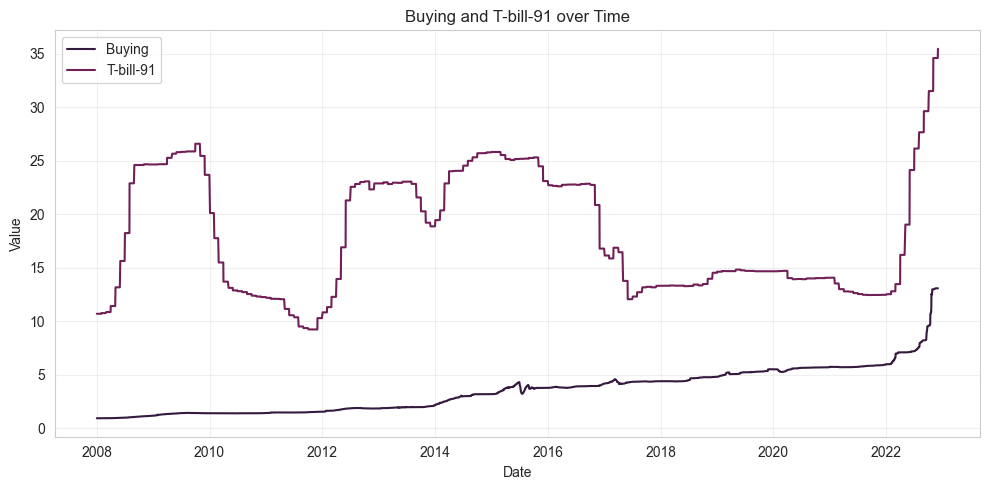

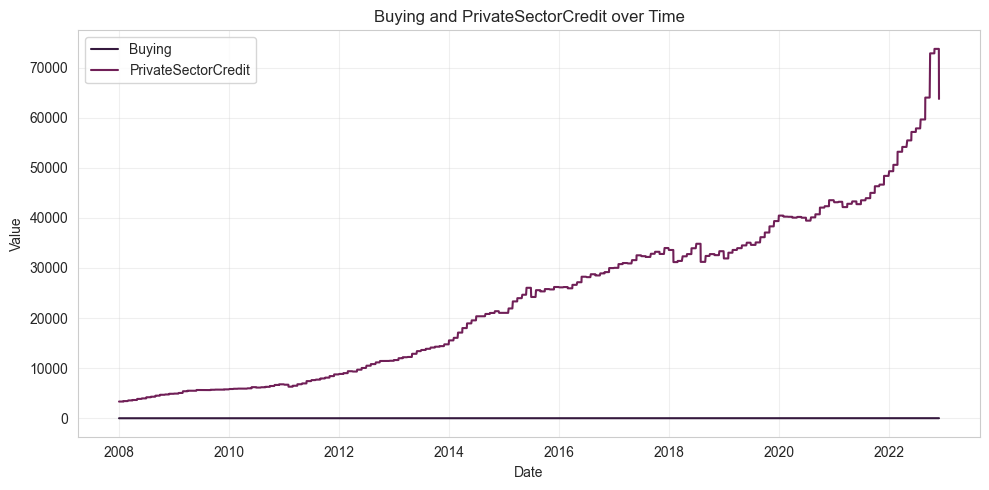

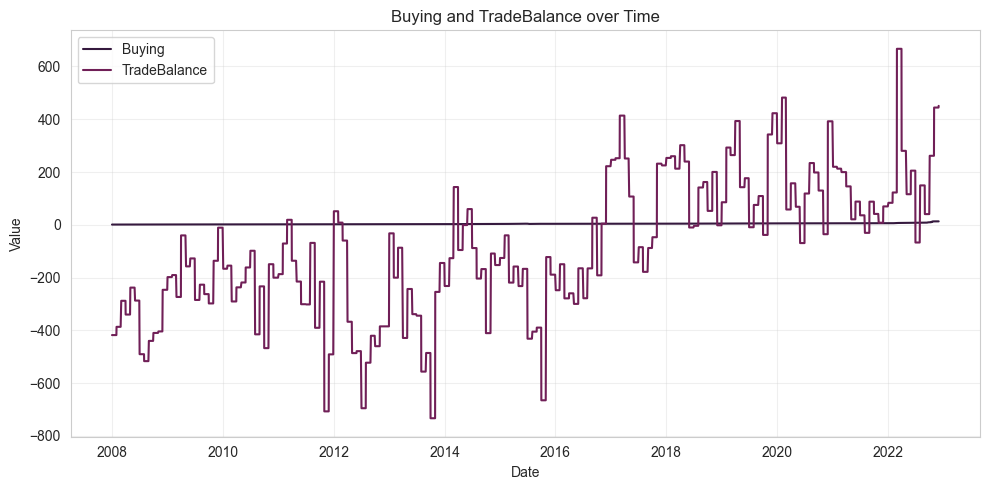

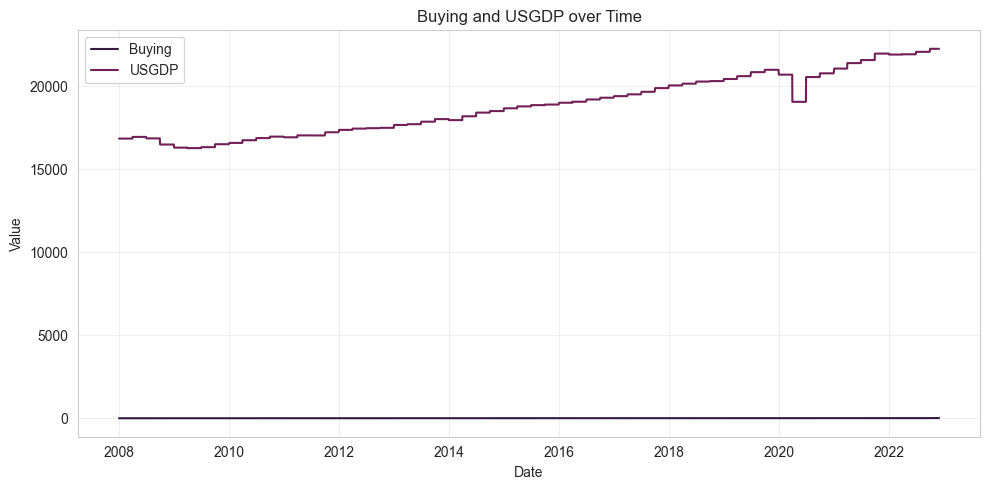

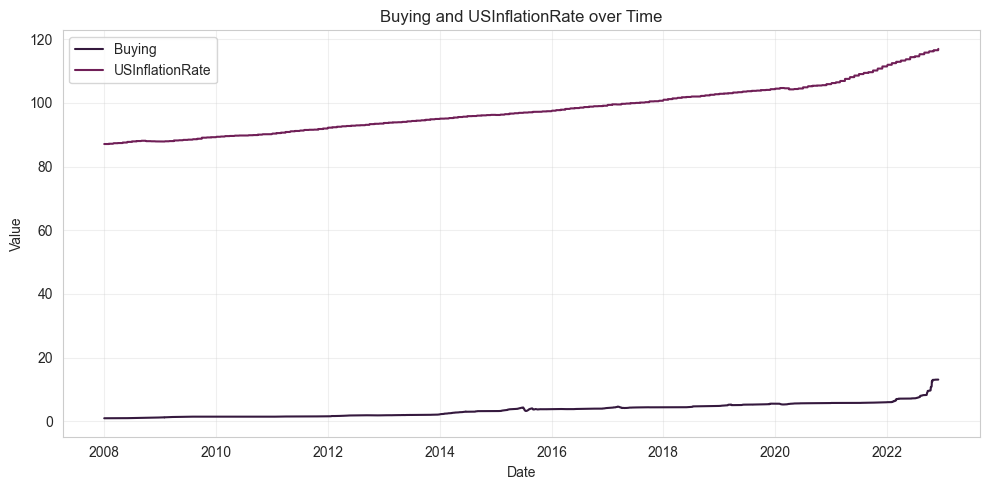

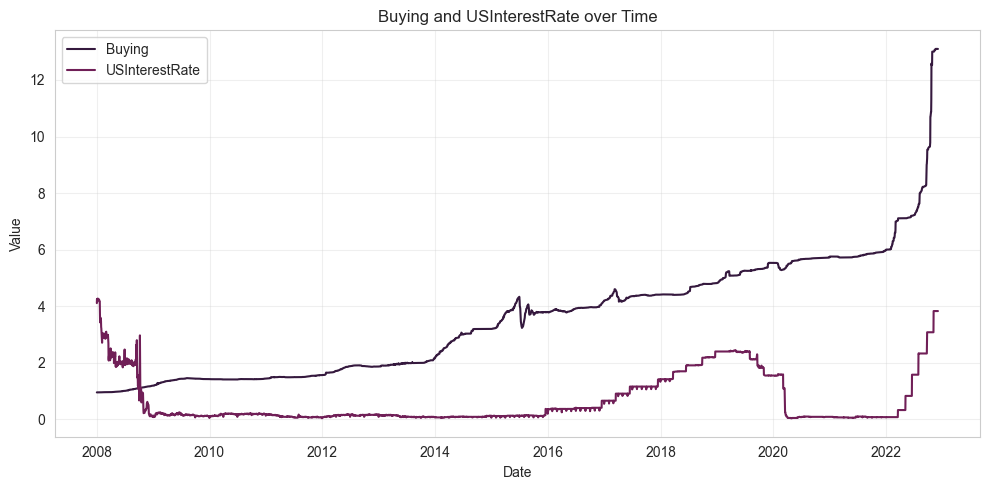

In [19]:
for col in df.columns:
    if col != 'Buying' and df[col].dtype in ['float64', 'int64']:
        plt.figure(figsize=(10, 5))
        plt.plot(df.index, df['Buying'], label='Buying')
        plt.plot(df.index, df[col], label=col)
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title(f'Buying and {col} over Time')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


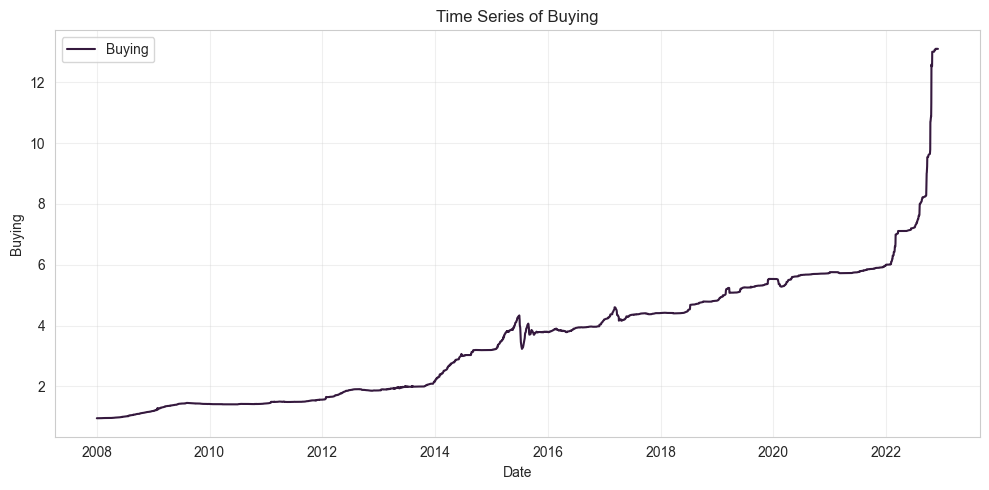

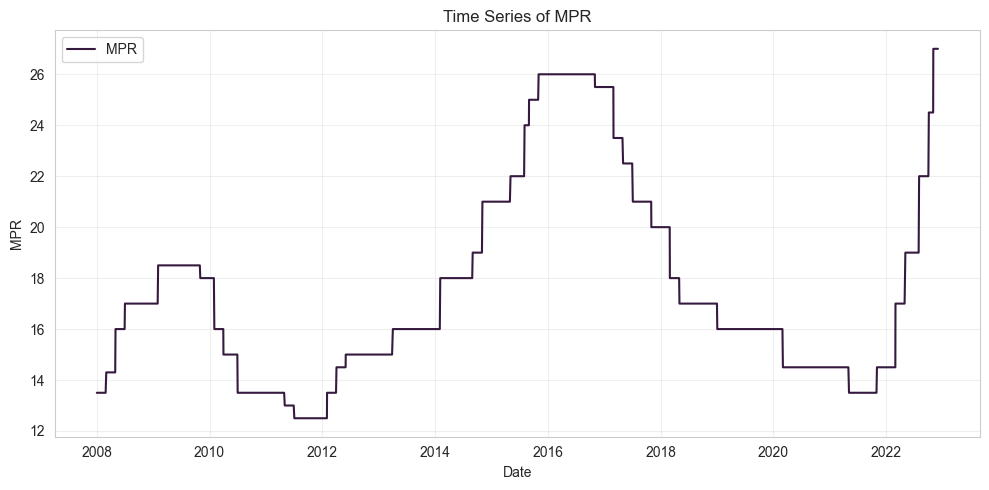

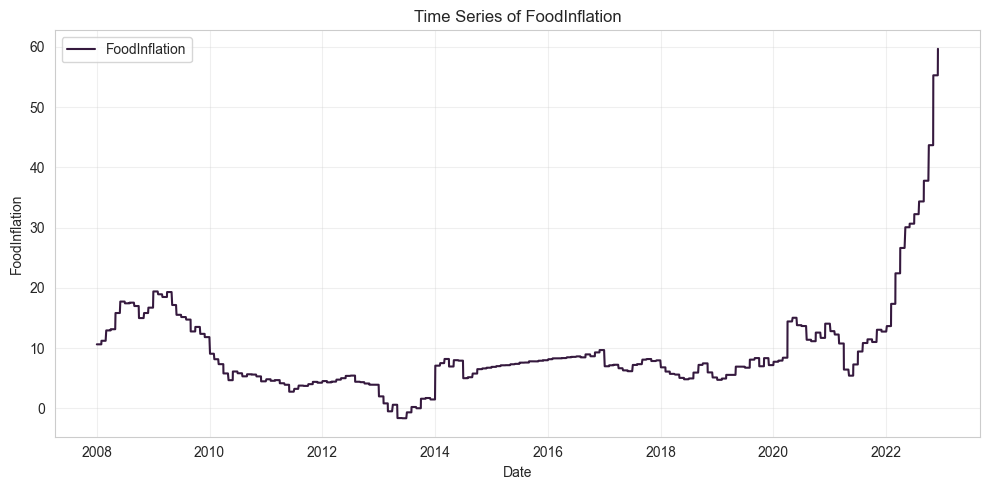

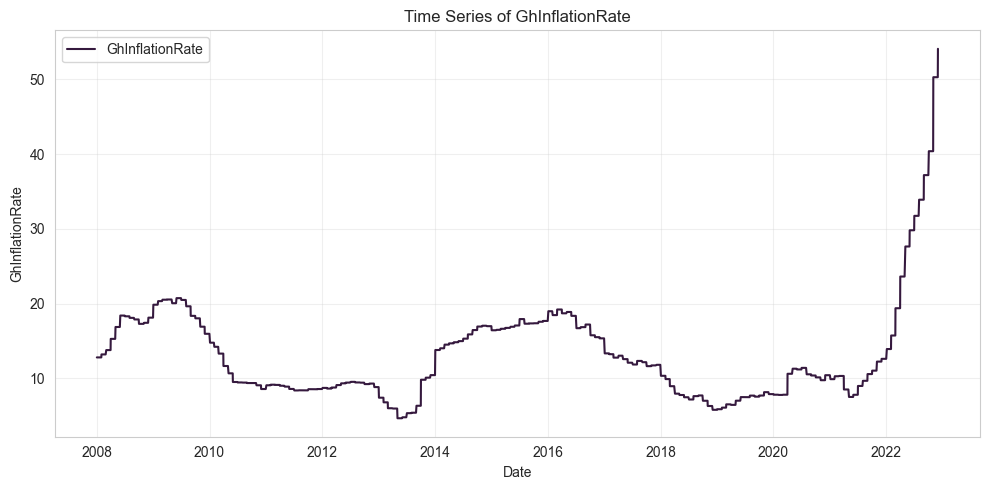

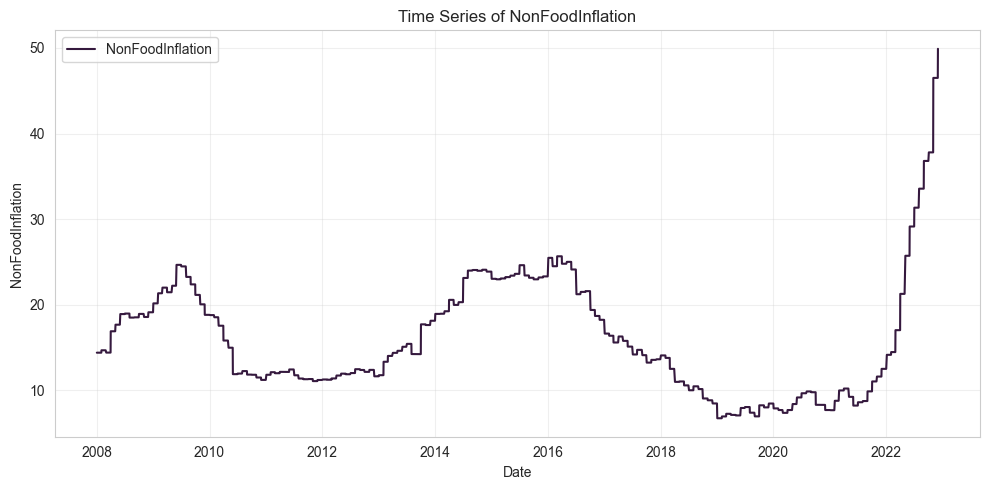

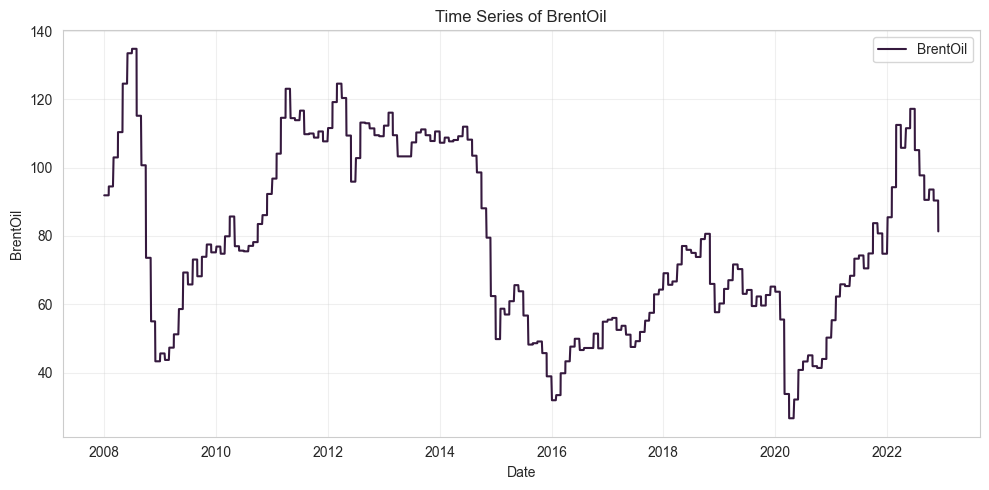

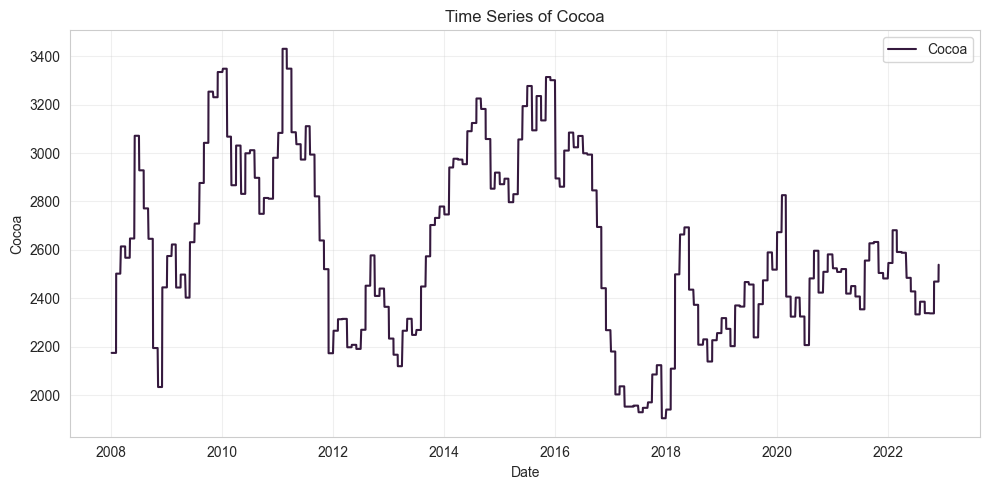

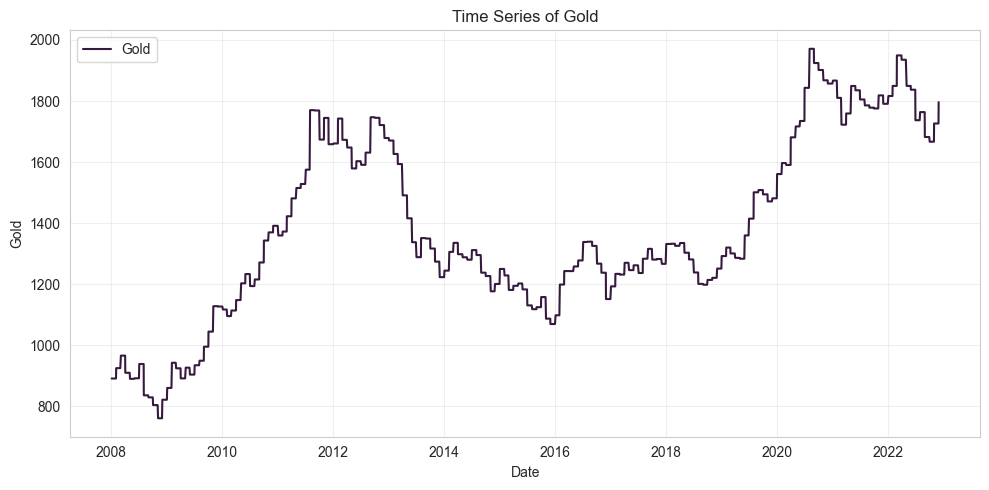

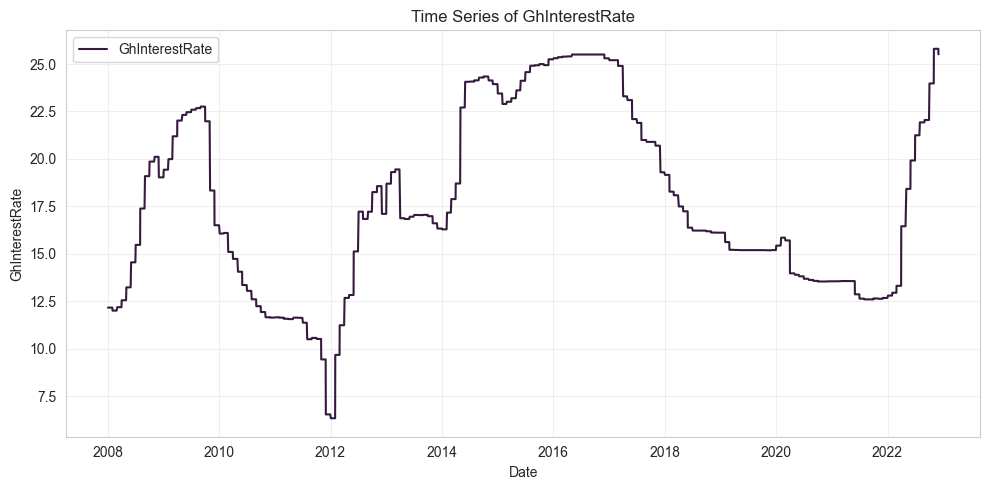

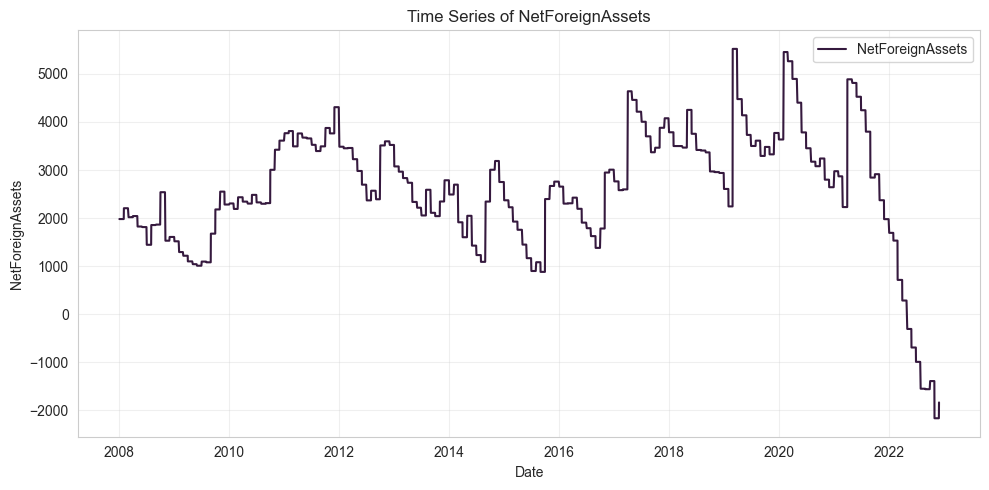

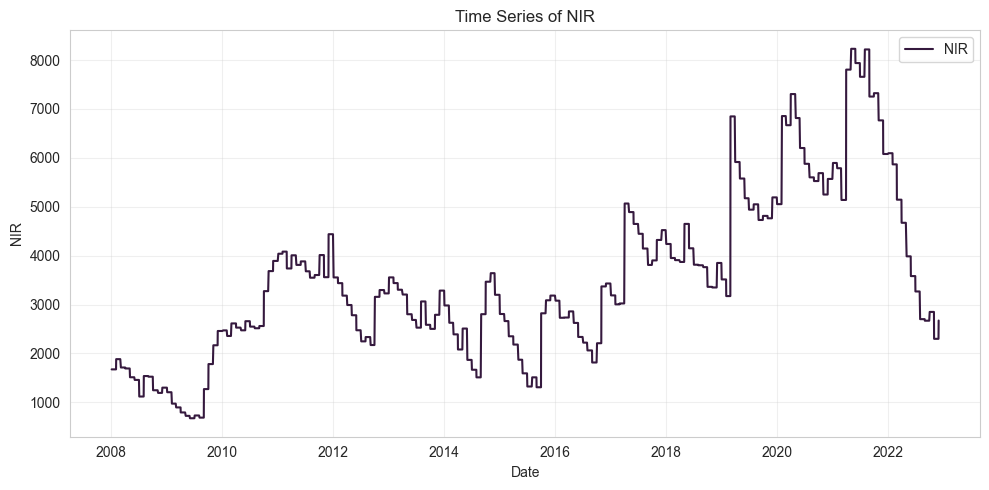

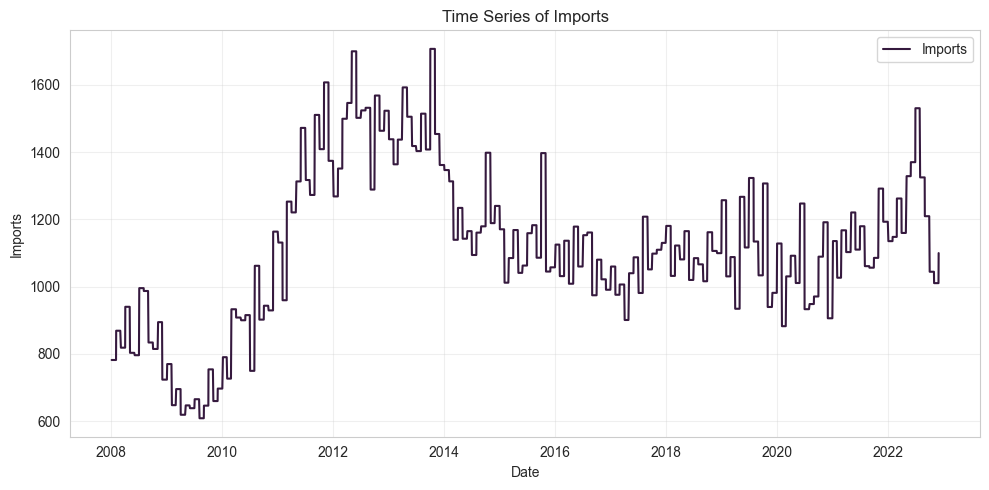

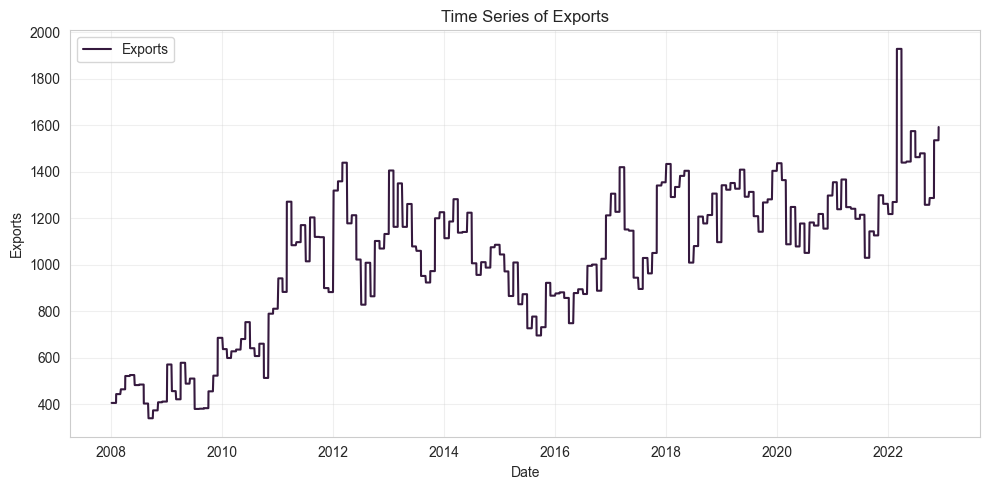

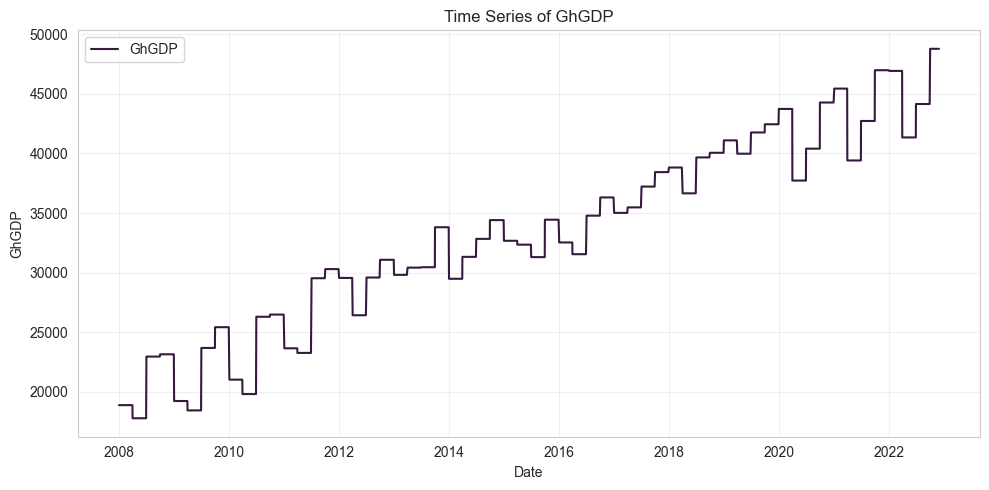

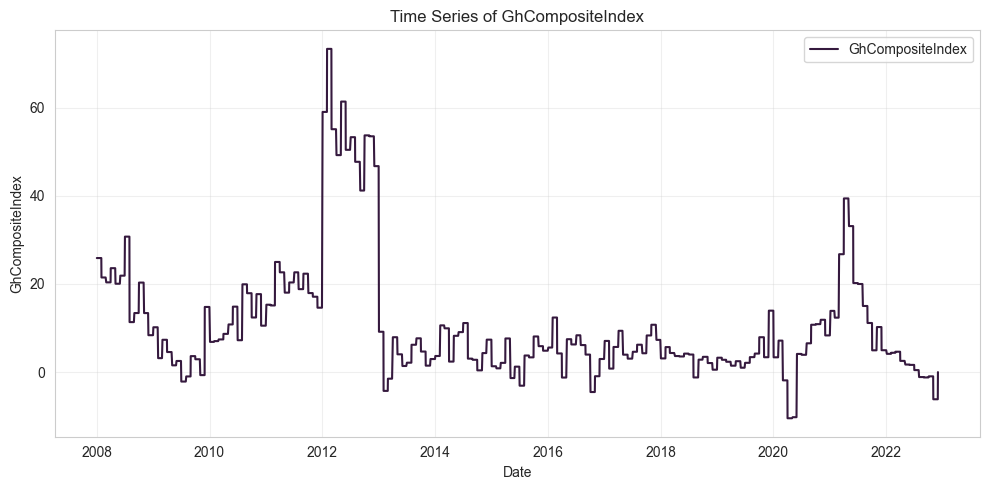

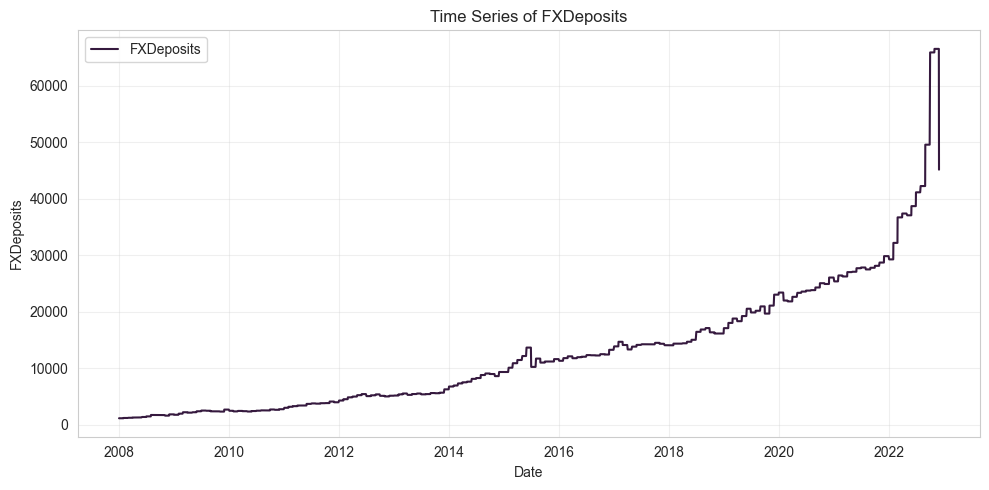

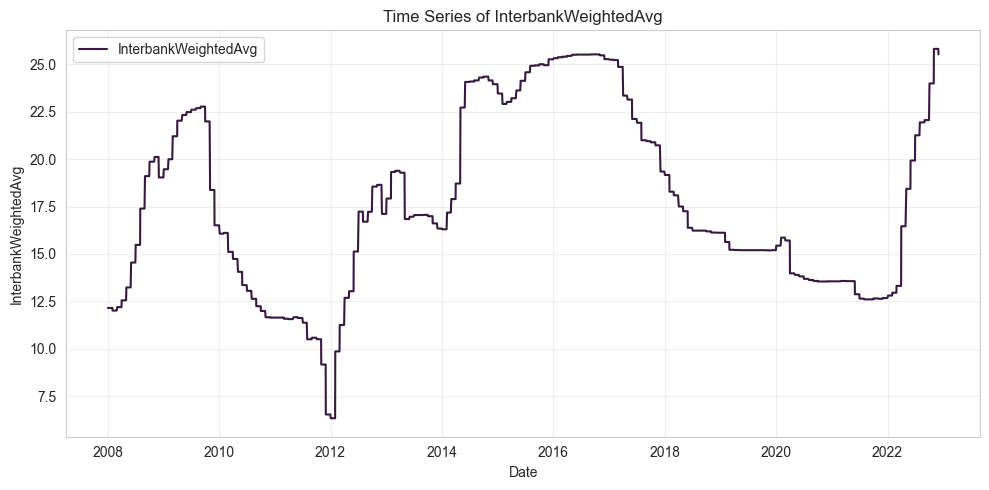

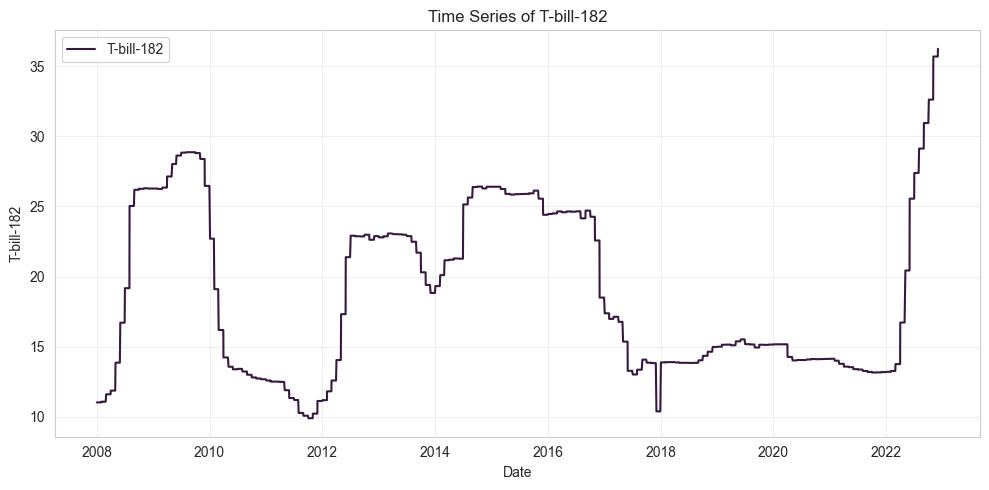

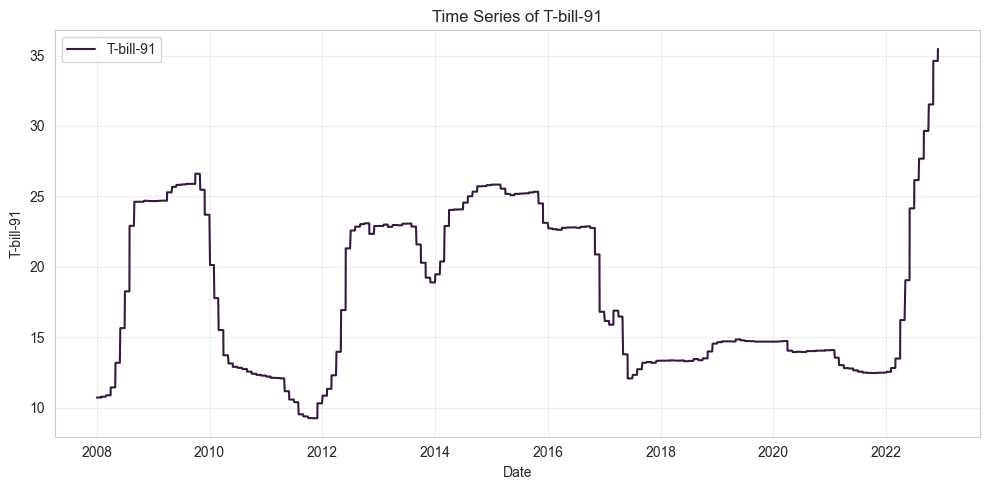

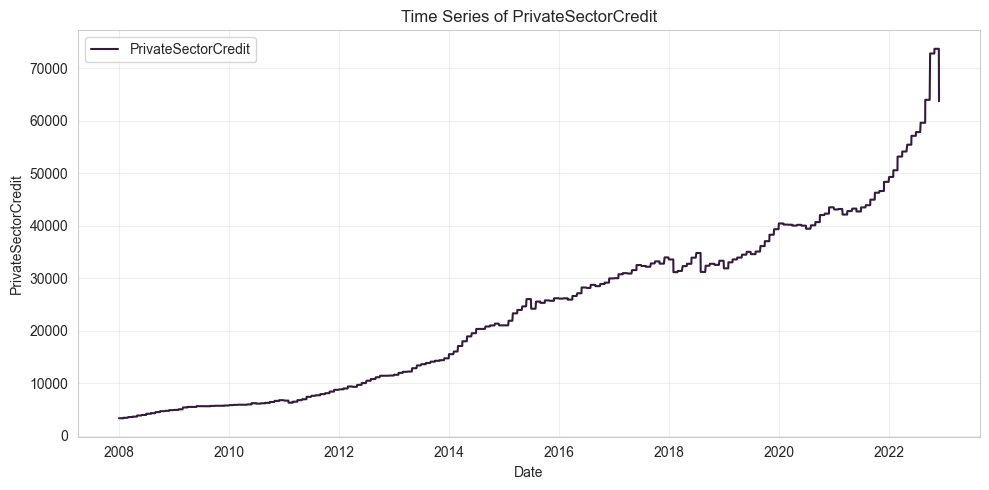

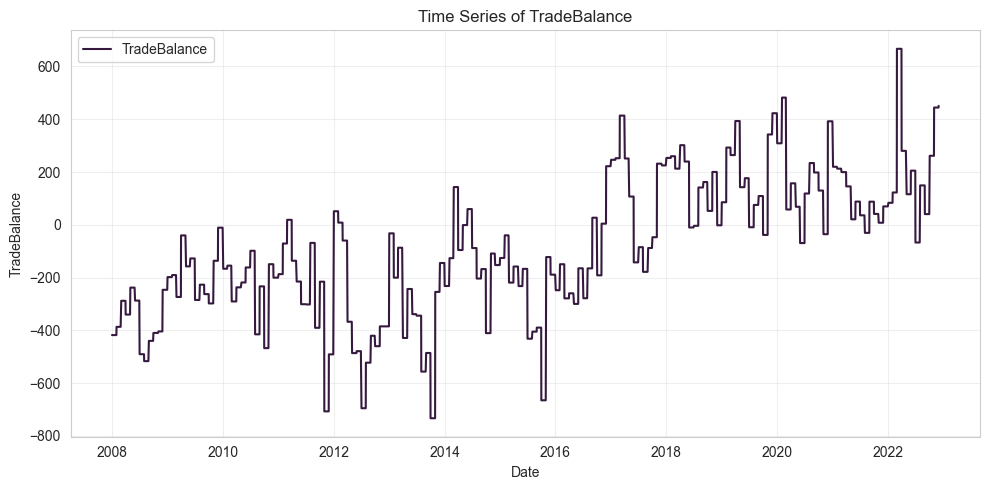

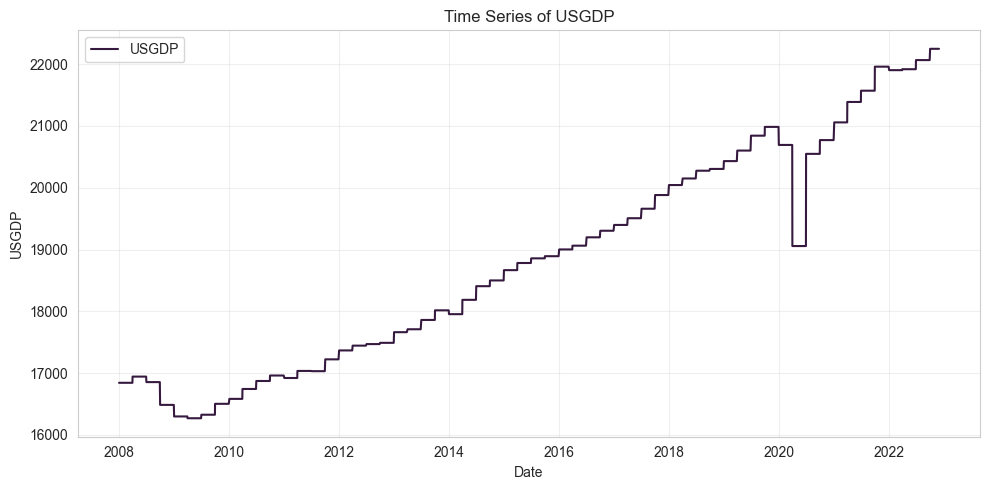

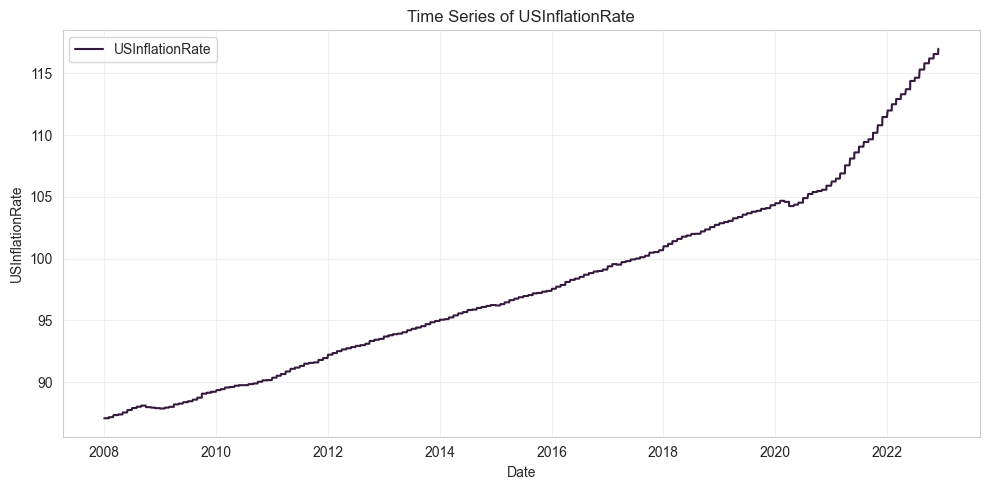

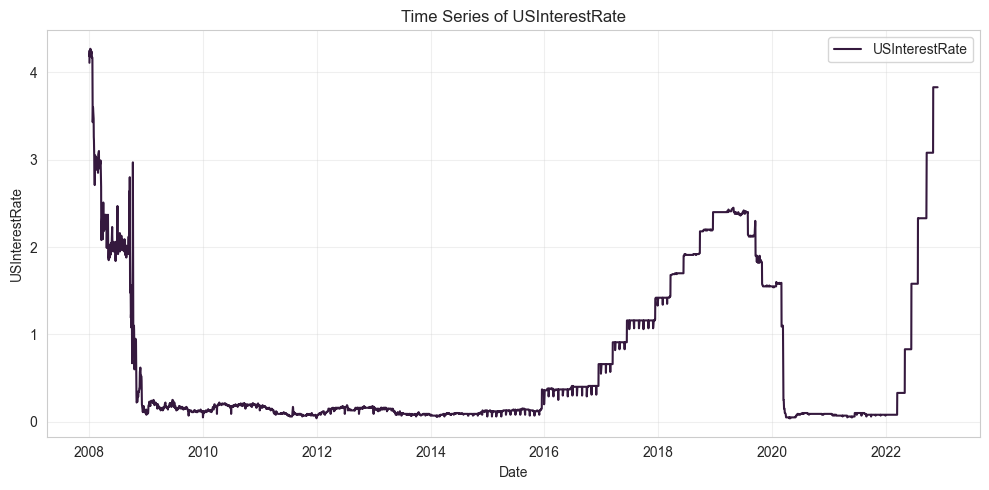

In [20]:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        plt.figure(figsize=(10, 5))
        plt.plot(df.index, df[col], label=col)
        plt.xlabel('Date')
        plt.ylabel(col)
        plt.title(f'Time Series of {col}')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
